
# HOUSING PRICE PREDICTION




Problem Statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the worlds economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modeling, Market mix modeling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the .CSV file below. The company is looking at prospective properties to buy houses to enter the market. We are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

Which variables are important to predict the price of variable?
How do these variables describe the price of the house?

DATA

Data has 1460 entries and it has 81 variables.

There two datasets: train.csv (1168 records)

test.csv(292 records)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv('/Users/pratiksingh/Downloads/Project-Housing_splitted/train.csv')
df_test=pd.read_csv('/Users/pratiksingh/Downloads/Project-Housing_splitted/test.csv')

In [4]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [5]:
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [6]:
df_train.shape

(1168, 81)

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [9]:
# Find columns with missing values and their percent missing
df_train.isnull().sum()                                                     
miss_val = df_train.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df_train.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df_train.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

MissvalCount Percent
PoolQC                1161   99.40
MiscFeature           1124   96.23
Alley                 1091   93.41
Fence                  931   79.71
FireplaceQu            551   47.17
LotFrontage            214   18.32
GarageYrBlt             64    5.48
GarageFinish            64    5.48
GarageType              64    5.48
GarageQual              64    5.48
GarageCond              64    5.48
BsmtExposure            31    2.65
BsmtFinType2            31    2.65
BsmtQual                30    2.57
BsmtCond                30    2.57
BsmtFinType1            30    2.57
MasVnrType               7    0.60
MasVnrArea               7    0.60

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [11]:
# Find columns with missing values and their percent missing
df_test.isnull().sum()                                                     
miss_val = df_test.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df_test.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df_test.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

MissvalCount Percent
PoolQC                 292  100.00
MiscFeature            282   96.58
Alley                  278   95.21
Fence                  248   84.93
FireplaceQu            139   47.60
LotFrontage             45   15.41
GarageType              17    5.82
GarageYrBlt             17    5.82
GarageQual              17    5.82
GarageCond              17    5.82
GarageFinish            17    5.82
BsmtCond                 7    2.40
BsmtFinType2             7    2.40
BsmtFinType1             7    2.40
BsmtQual                 7    2.40
BsmtExposure             7    2.40
MasVnrArea               1    0.34
MasVnrType               1    0.34
Electrical               1    0.34

By comparing both train and test data column PoolQC,MiscFeature,Alley,Fence,FireplaceQu having more than 45% data is missing.

So removing from data set, remaining all very small percent and fill the null values.

In [12]:
df_train= df_train.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1)
df_test= df_test.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1)

In [13]:
print(df_train.shape)
print(df_test.shape)

(1168, 76)
(292, 75)


In [14]:
for i, column_data in enumerate(df_train.dtypes.items()):
    column , dtype = column_data
    if dtype=='object':
        df_train[column].fillna(method='backfill',inplace=True)
    else:
        df_train[column].fillna(df_train[column].mean(), inplace=True)

In [15]:
df_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [16]:
for i, column_data in enumerate(df_test.dtypes.items()):
    column , dtype = column_data
    if dtype=='object':
        df_test[column].fillna(method='backfill',inplace=True)
    else:
        df_test[column].fillna(df_test[column].mean(), inplace=True)

In [17]:
df_test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [18]:
print(df_train.shape)
print(df_test.shape)

(1168, 76)
(292, 75)


Now we can see tat there is no missing values in the dataset.

In [22]:
for column_data in df_train.dtypes.items():
    column, dtype = column_data
    if dtype == 'object':
        print(column)
        print(df_train[column].value_counts())
        print('-'*30)
    else:
        print(column)
        print(df_train[column].value_counts())
        print('-'*30)

Id
1       1
946     1
964     1
963     1
962     1
       ..
480     1
479     1
478     1
477     1
1460    1
Name: Id, Length: 1168, dtype: int64
------------------------------
MSSubClass
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
------------------------------
MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
------------------------------
LotFrontage
70.98847     214
60.00000     111
80.00000      60
70.00000      58
75.00000      46
            ... 
141.00000      1
144.00000      1
111.00000      1
39.00000       1
46.00000       1
Name: LotFrontage, Length: 107, dtype: int64
------------------------------
LotArea
9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length:

In [23]:
df_train['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

As it shows that the 75% of Max having difference and our column is rightly skewed.

skewing for plotting with variables.

Skew is: 1.953877705368286


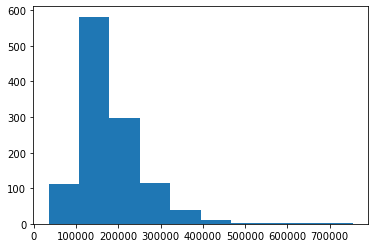

Skew is: 0.07360997199445295


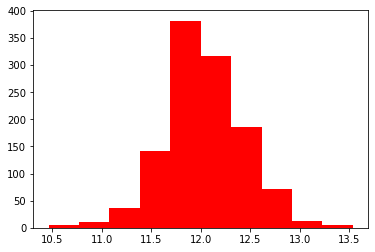

In [26]:
# Determining the Skewness of data 
print ("Skew is:", df_train.SalePrice.skew())

plt.hist(df_train.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
df_train['Skewed_SP'] = np.log(df_train['SalePrice']+1)
print ("Skew is:", df_train['Skewed_SP'].skew())
plt.hist(df_train['Skewed_SP'], color='r')
plt.show()

In [27]:
categorical_cols = [ i for i in df_train.columns if df_train[i].dtype==object]
#categorical_cols
print(len(categorical_cols))

38


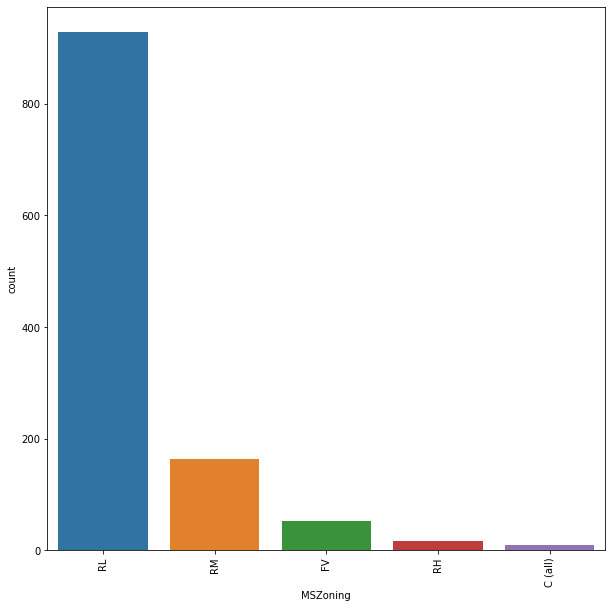

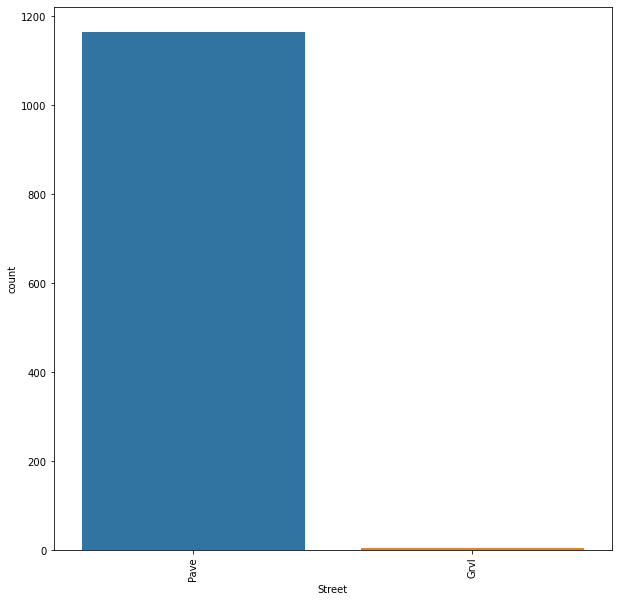

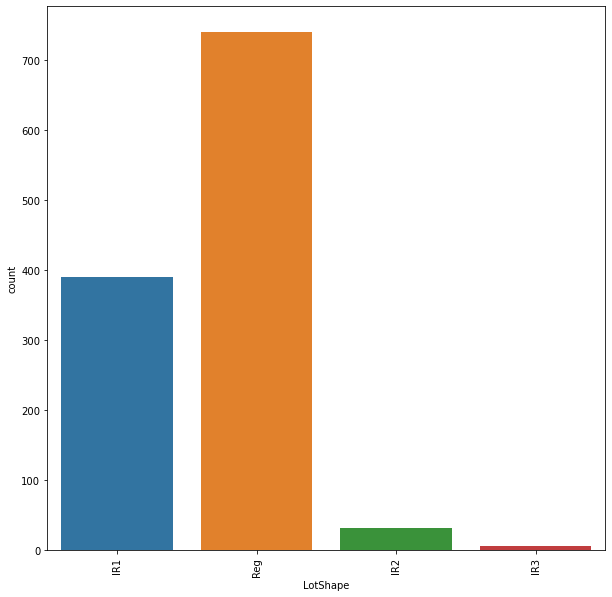

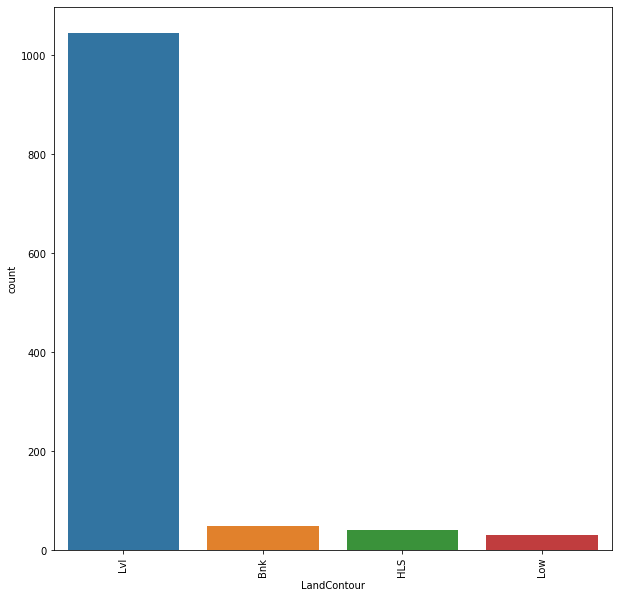

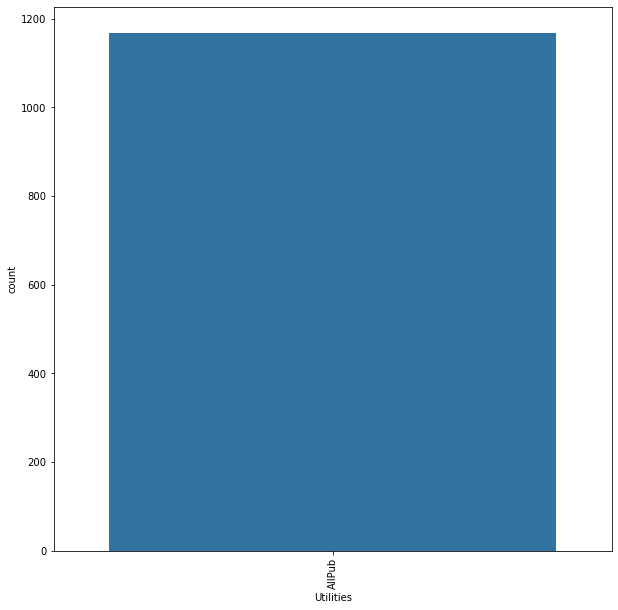

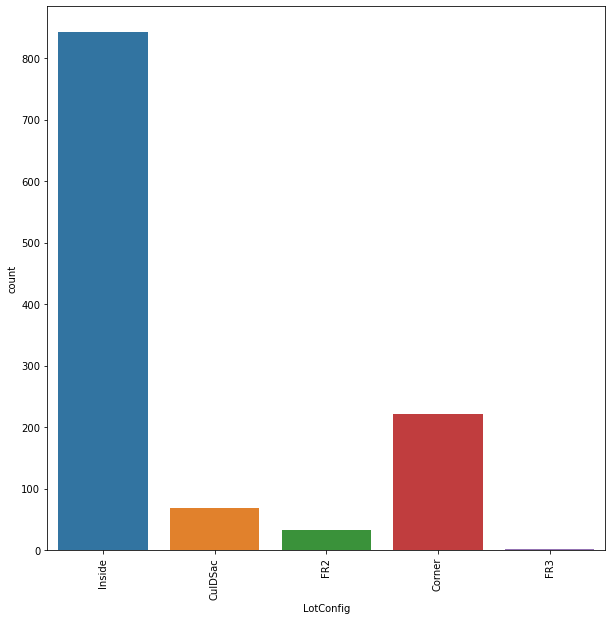

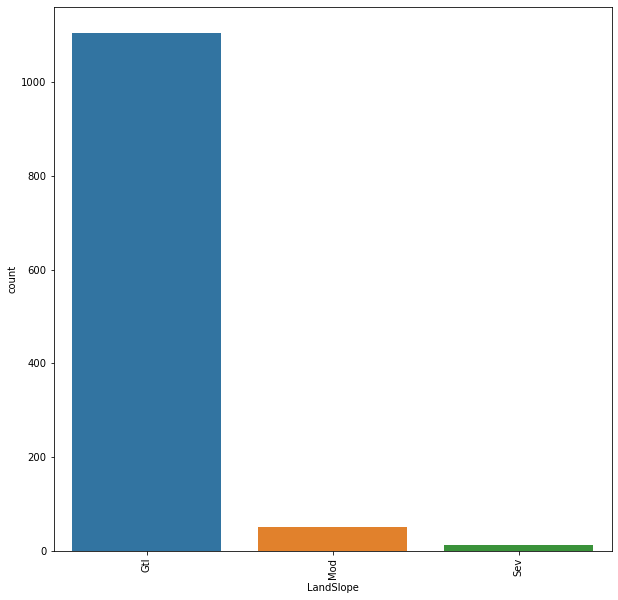

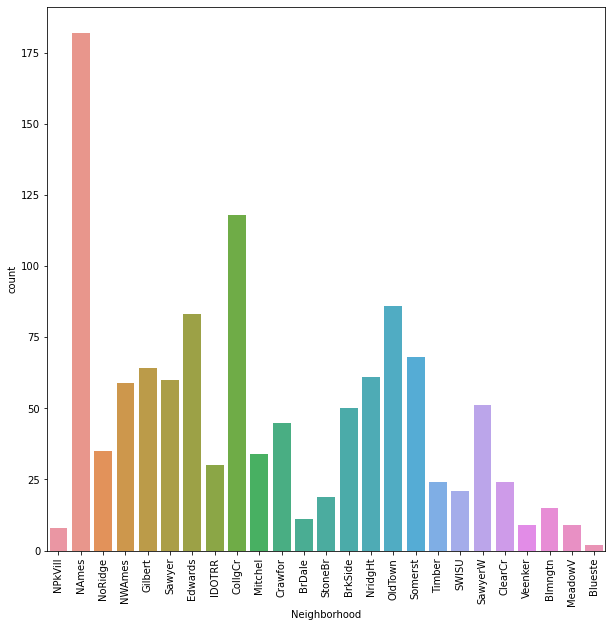

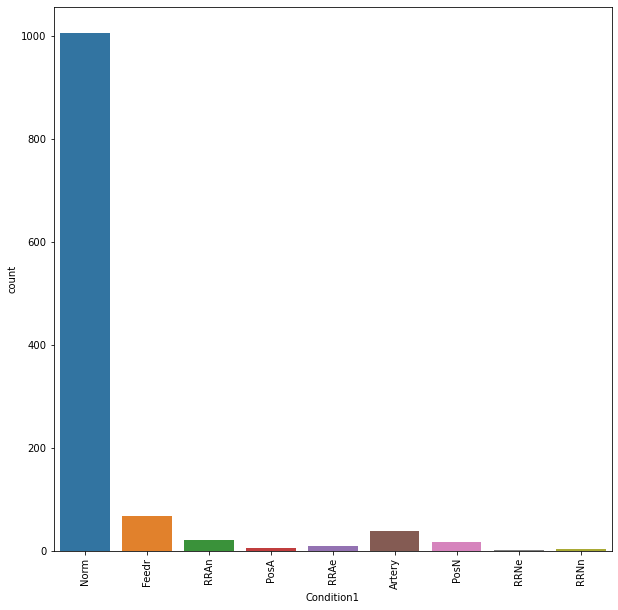

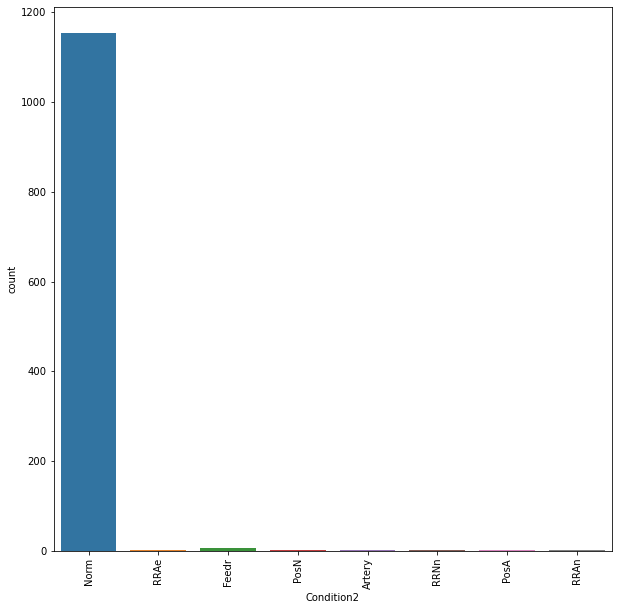

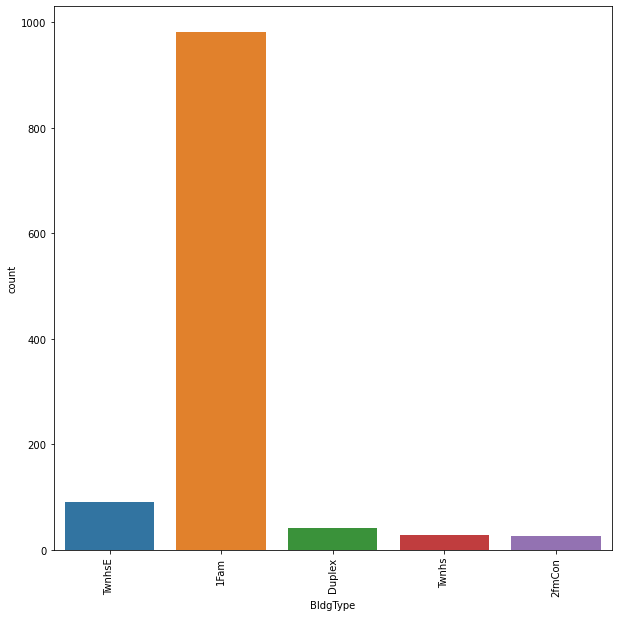

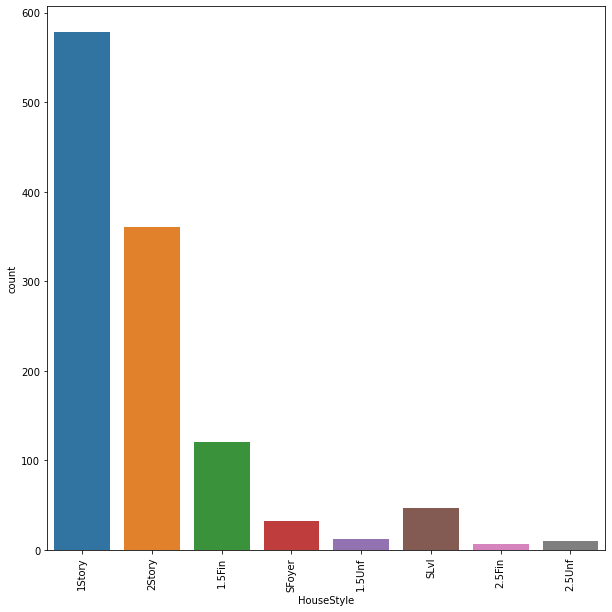

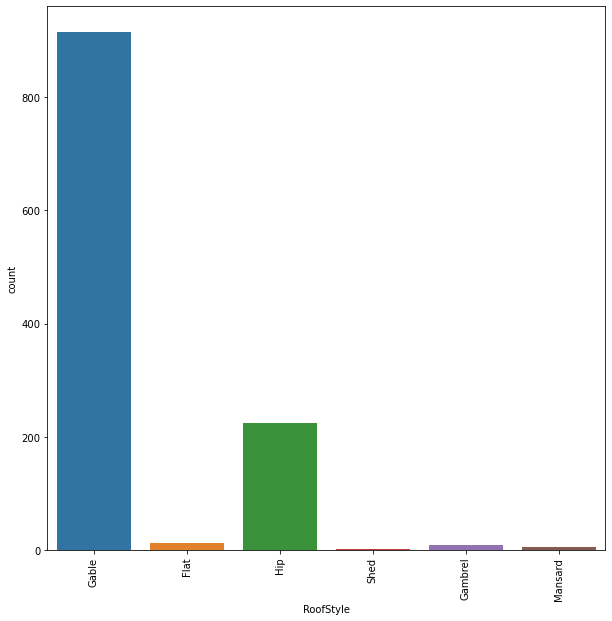

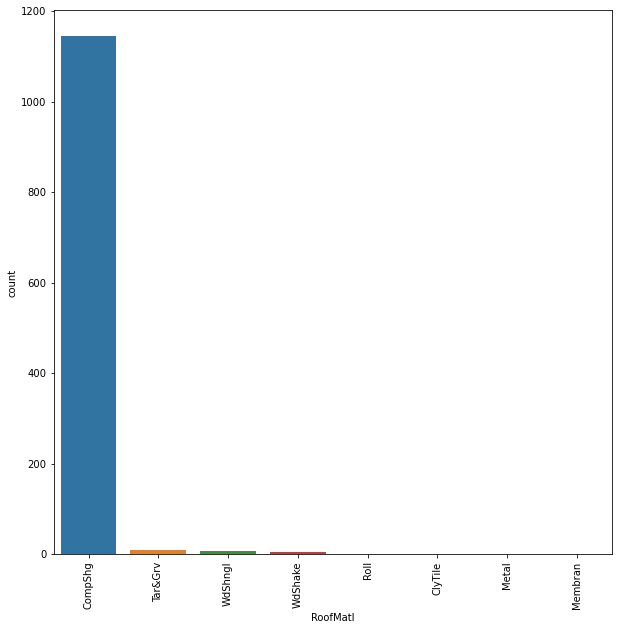

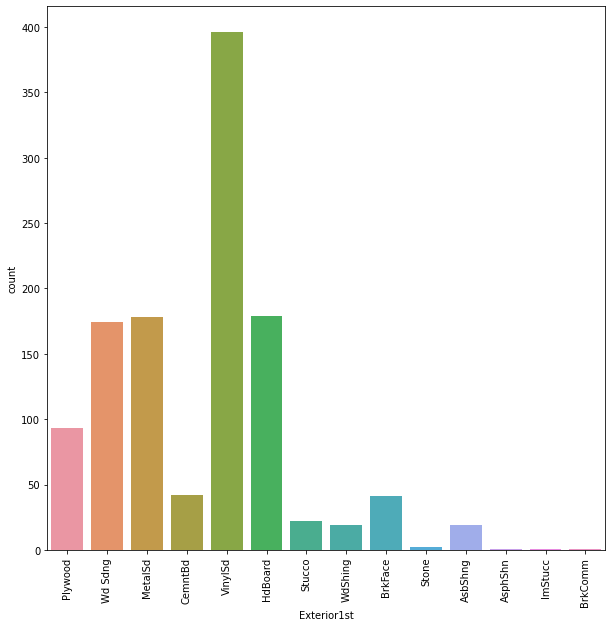

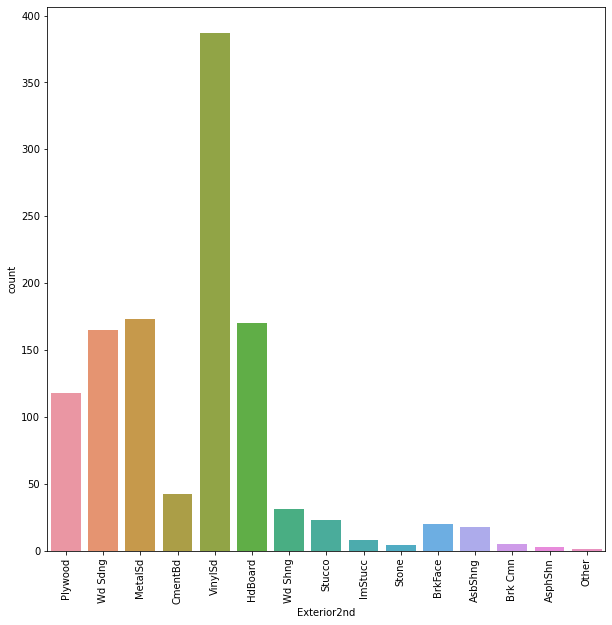

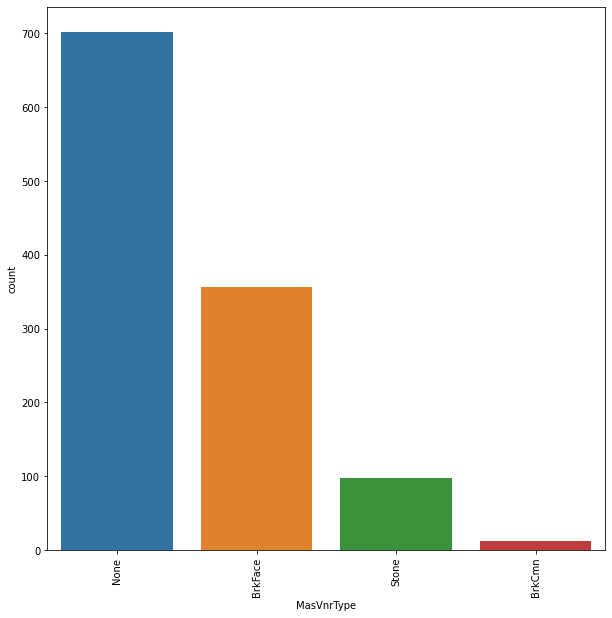

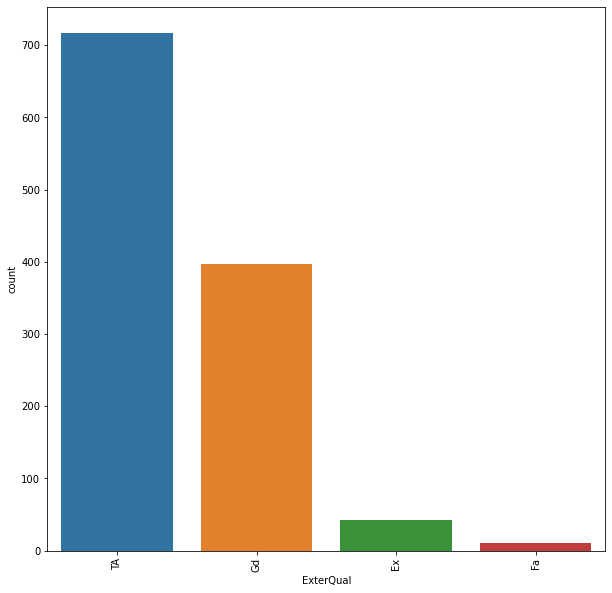

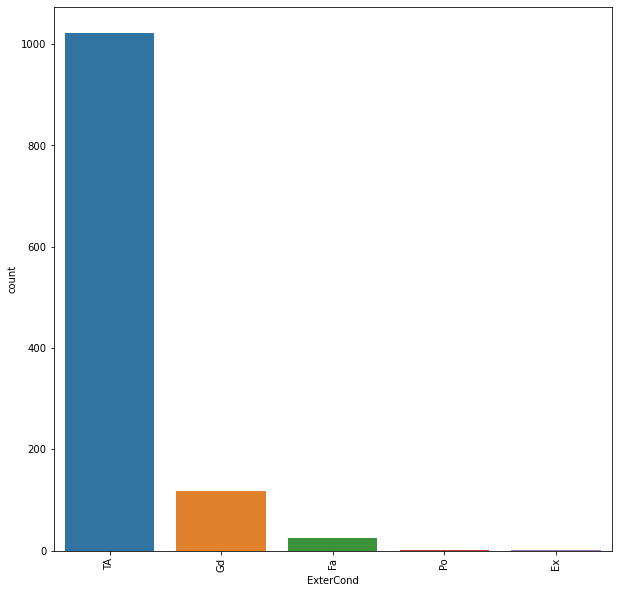

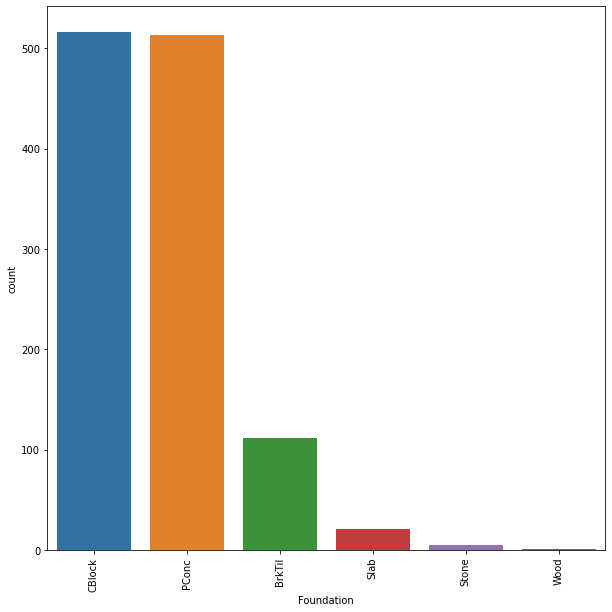

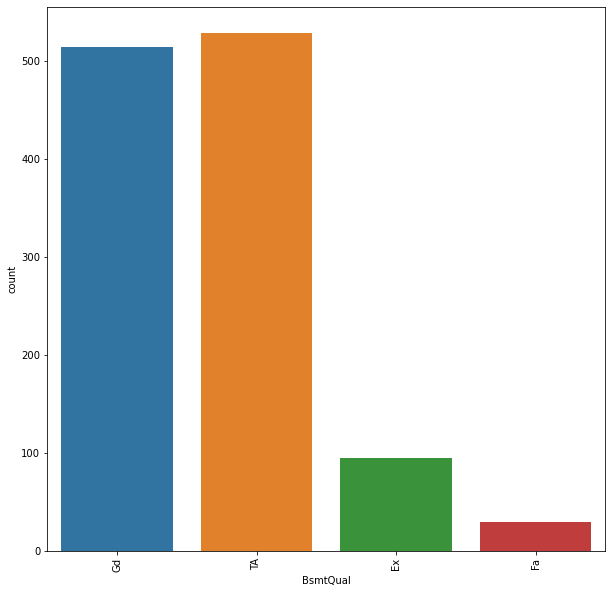

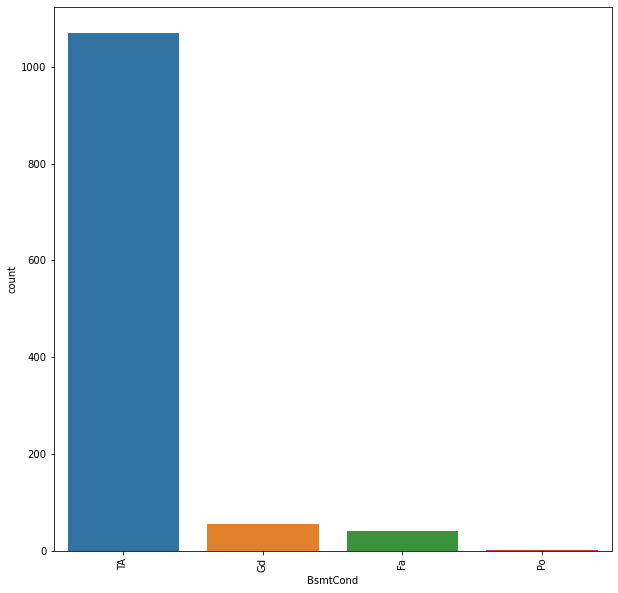

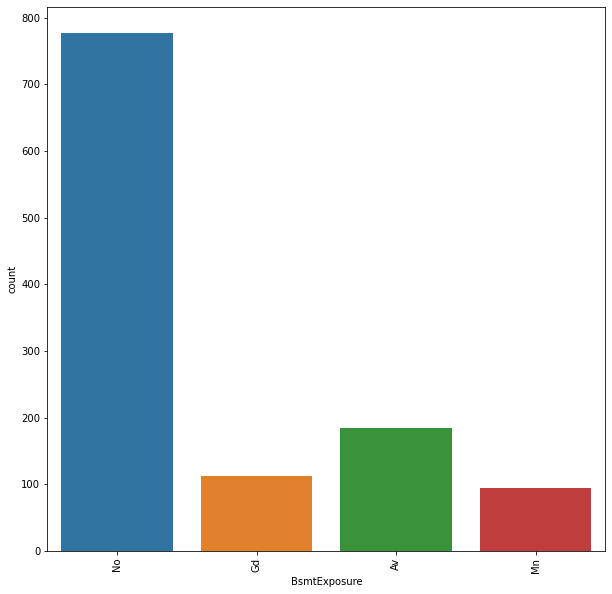

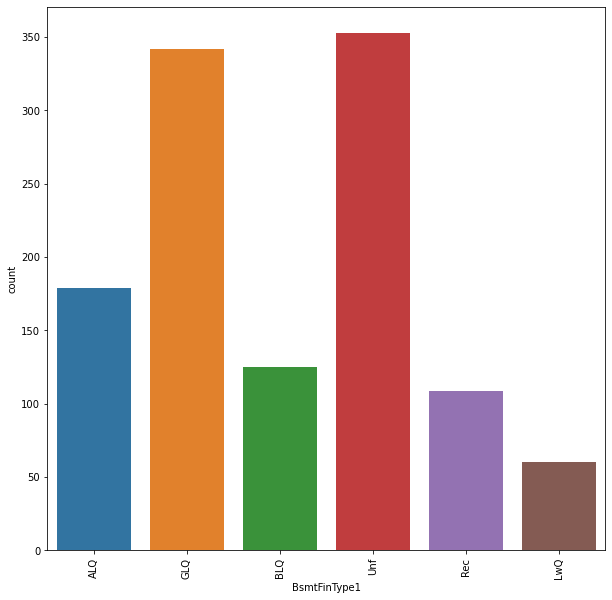

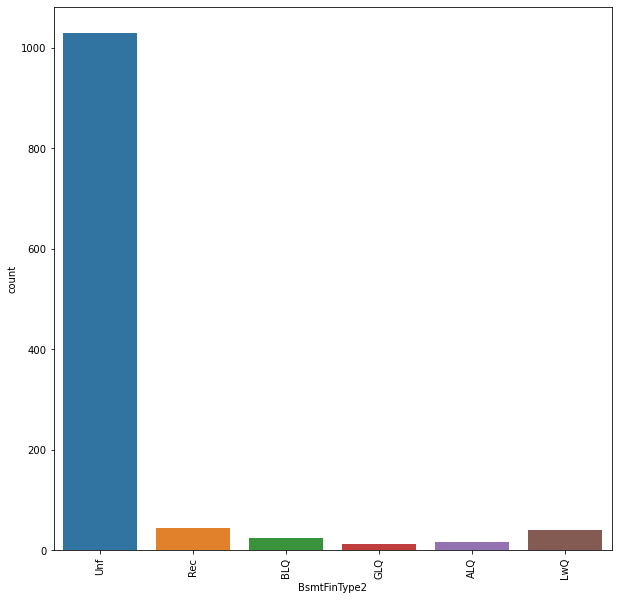

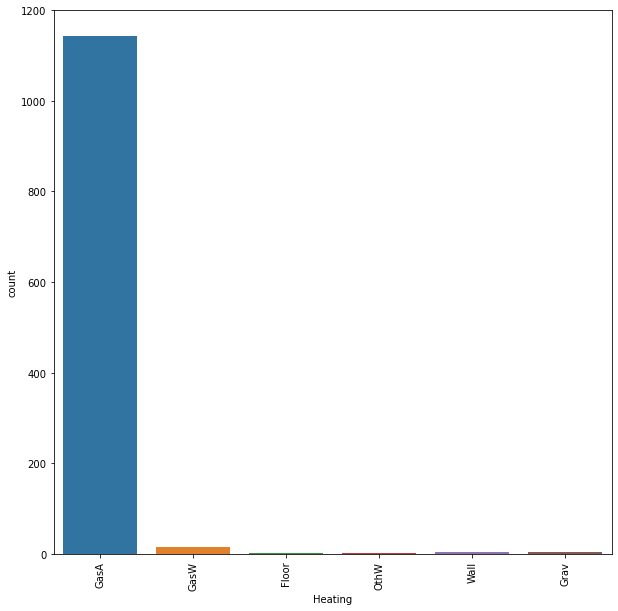

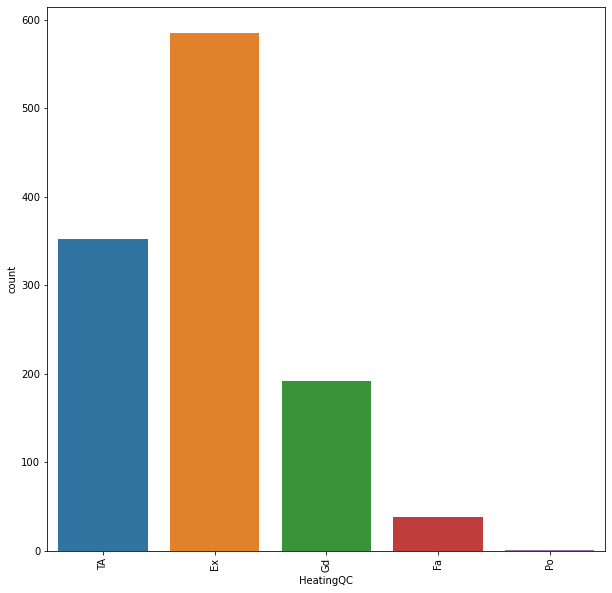

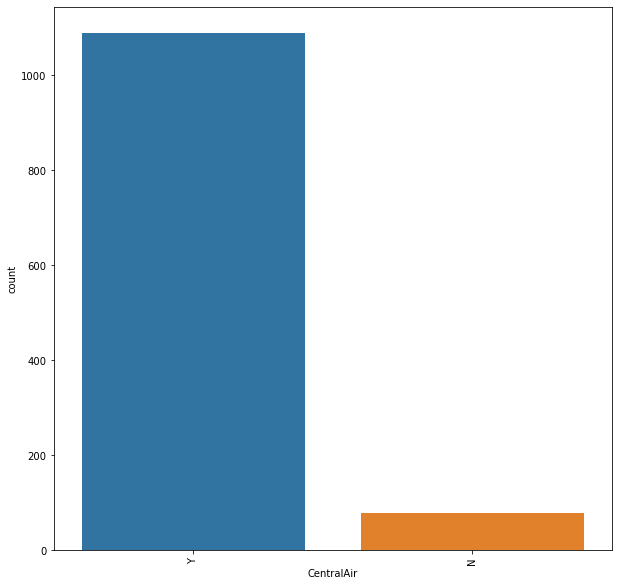

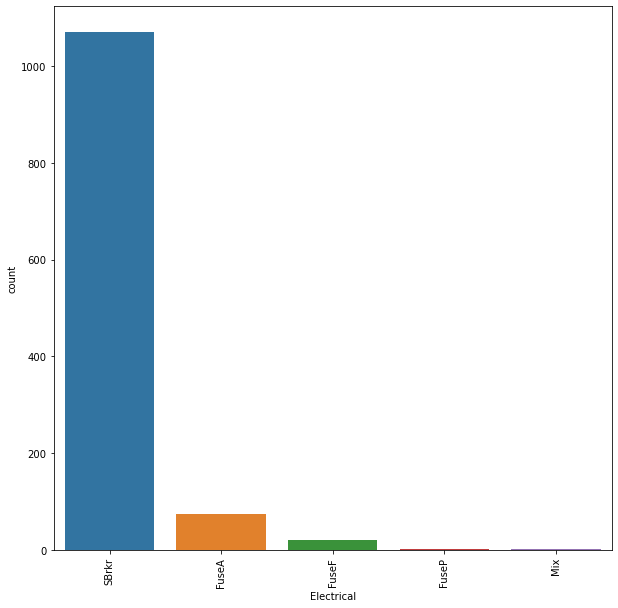

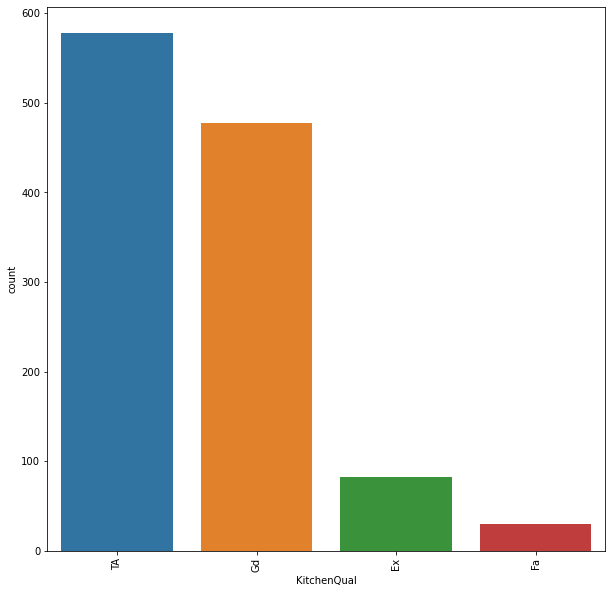

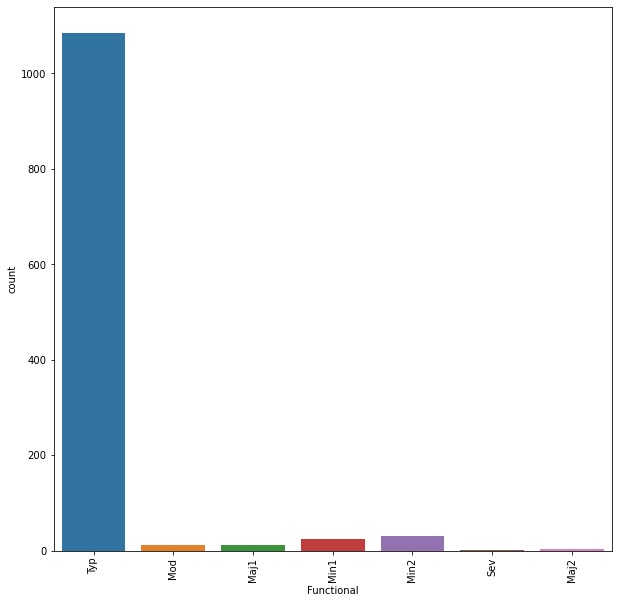

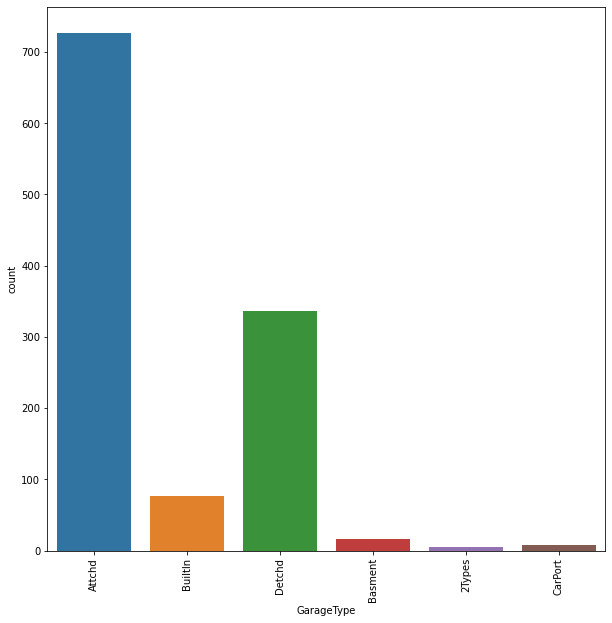

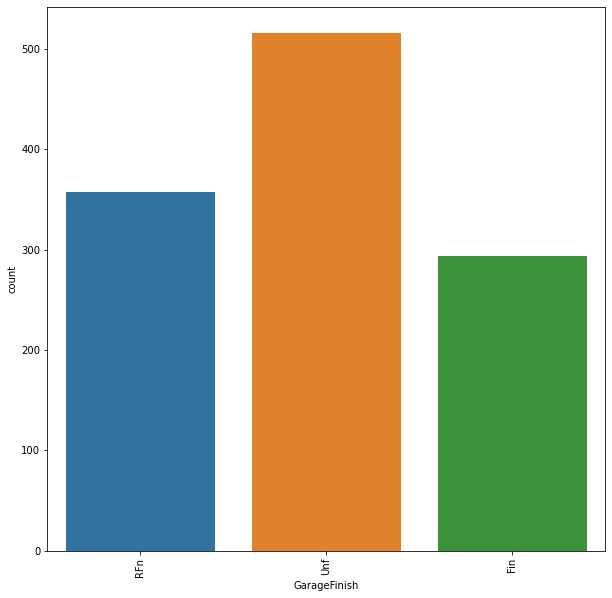

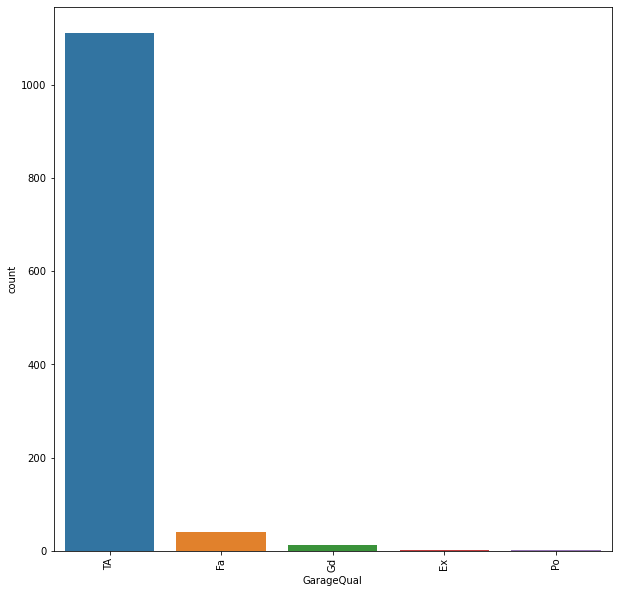

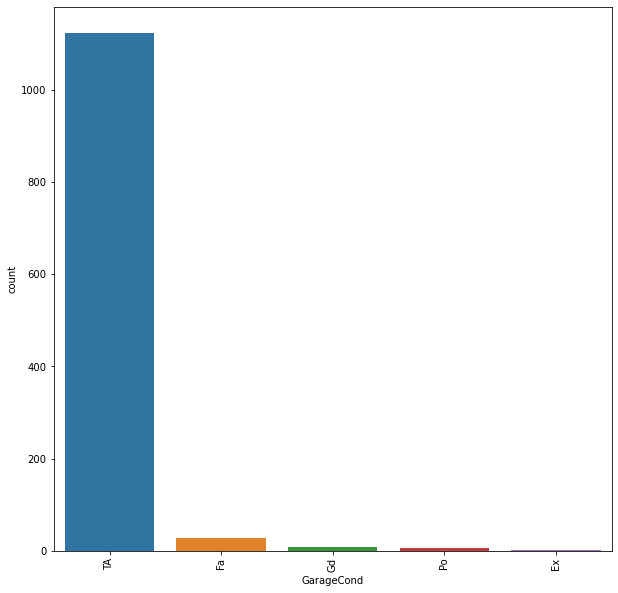

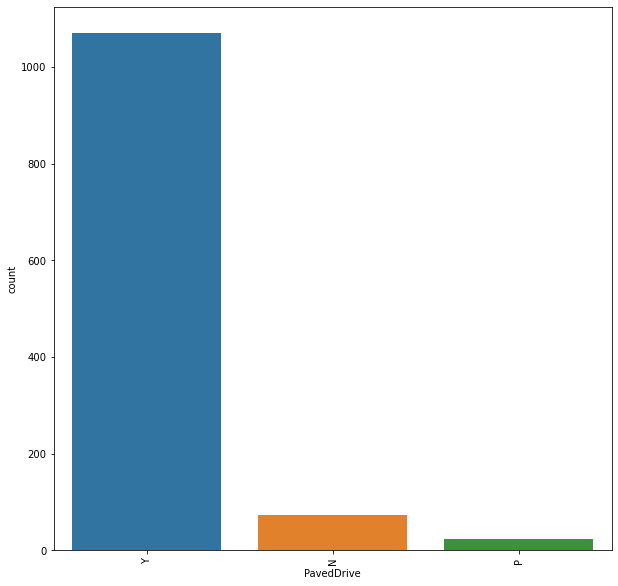

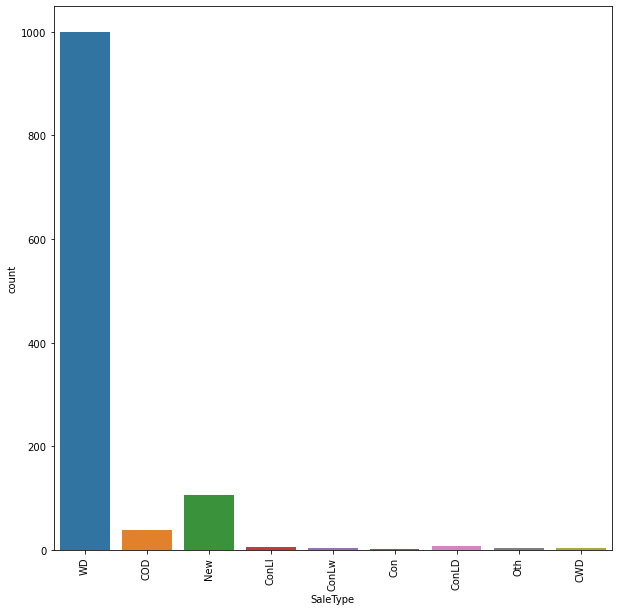

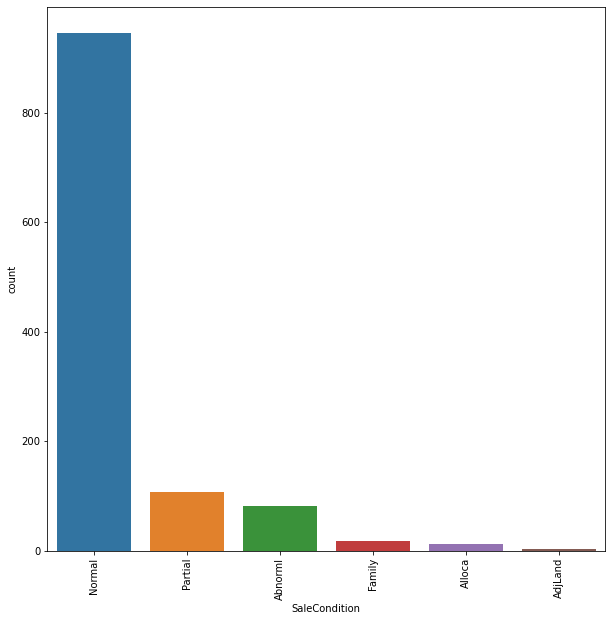

In [28]:
for i in categorical_cols:
    plt.figure(figsize = (10,10))
    sns.countplot(df_train[i])
    plt.xticks(rotation = 90)
    plt.show()
   

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

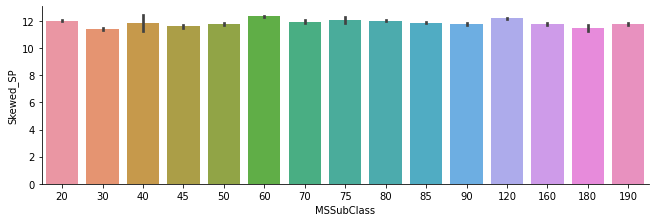

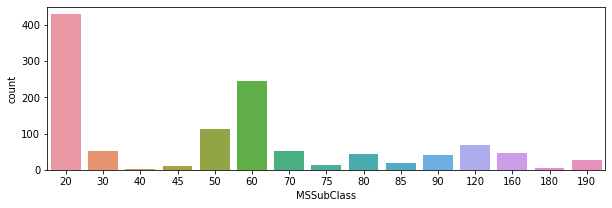

In [29]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=df_train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=df_train)
df_train['MSSubClass'].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

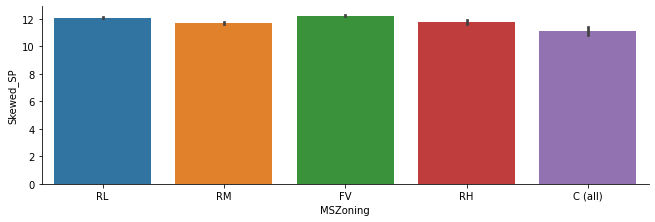

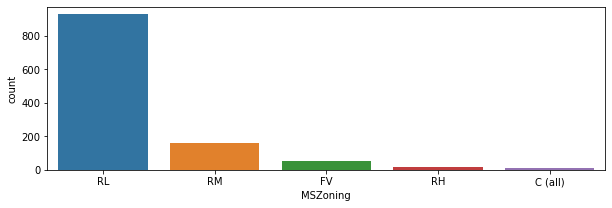

In [30]:
sns.factorplot('MSZoning', 'Skewed_SP', data=df_train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=df_train, ax=axis1)
df_train['MSZoning'].value_counts()

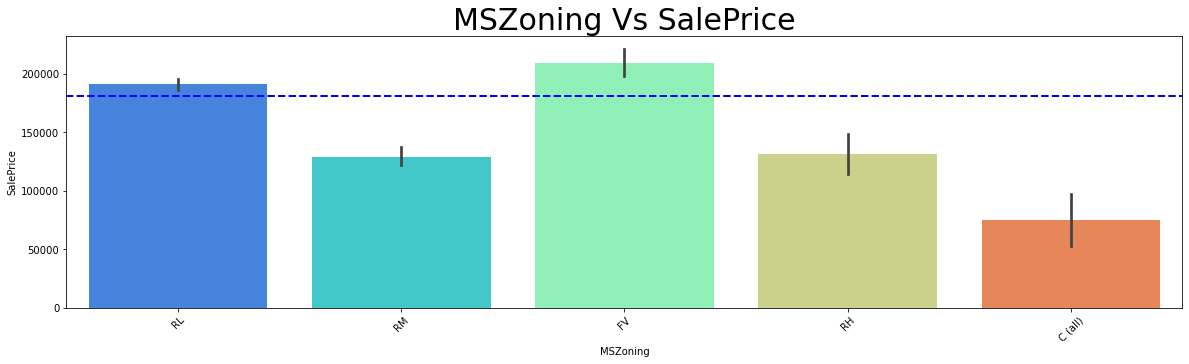

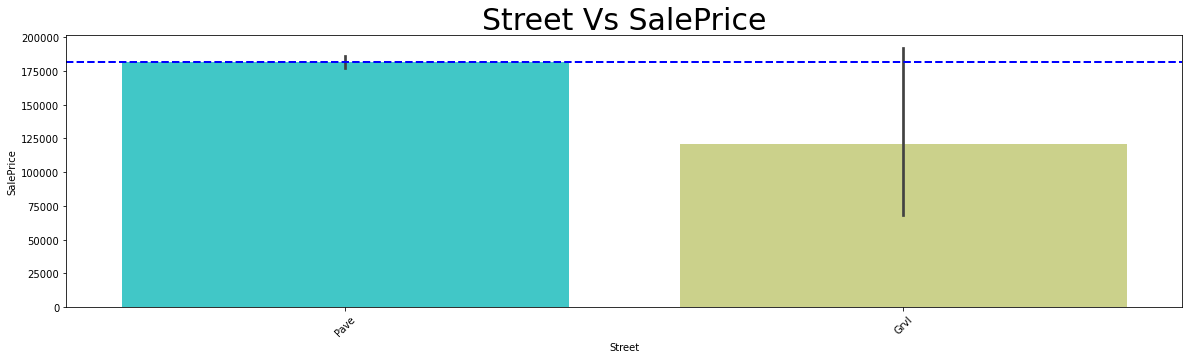

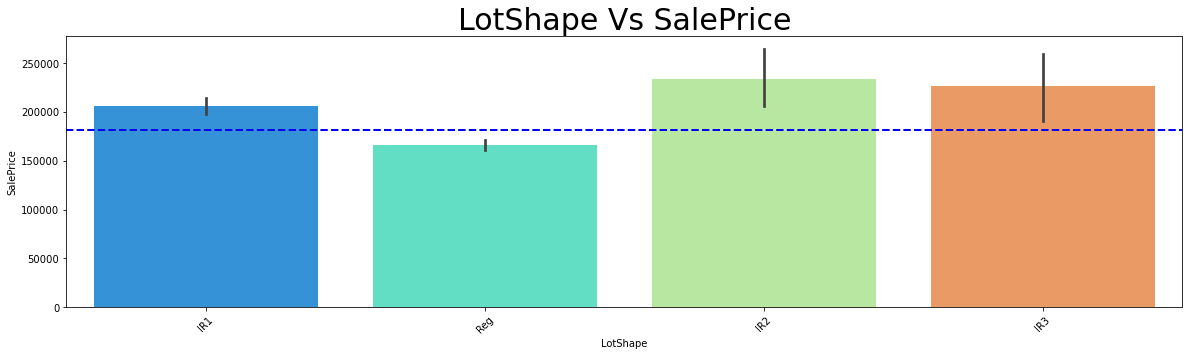

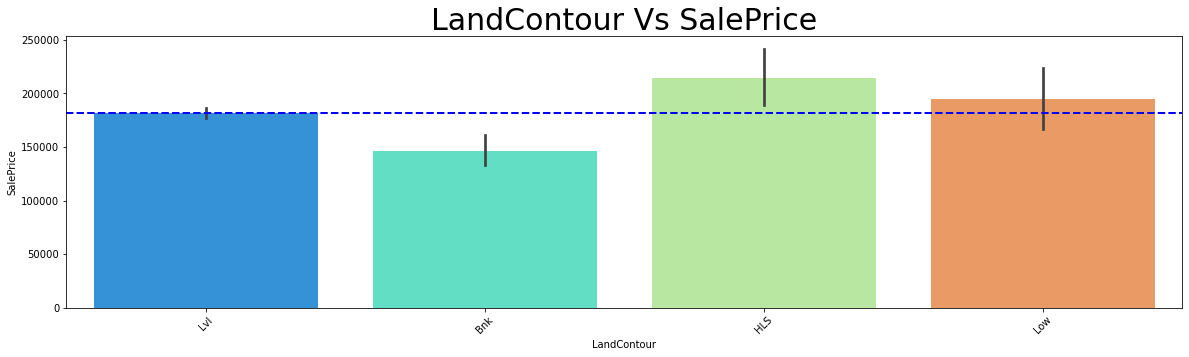

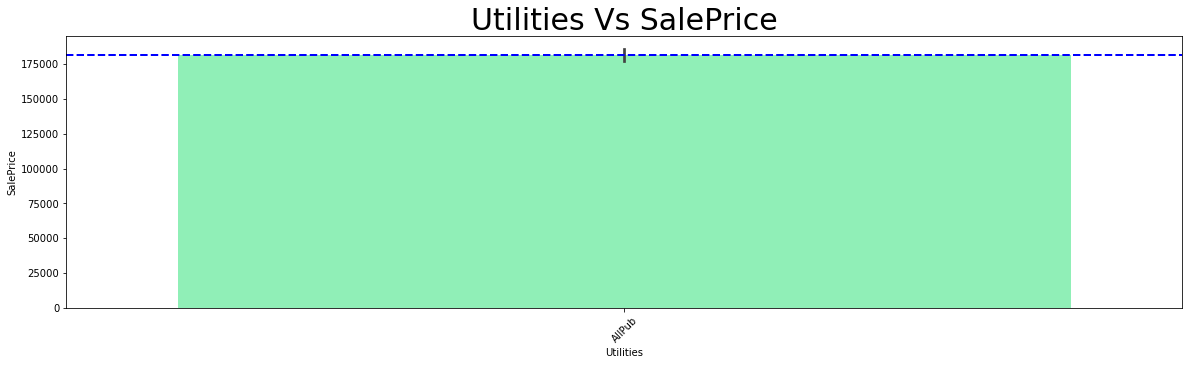

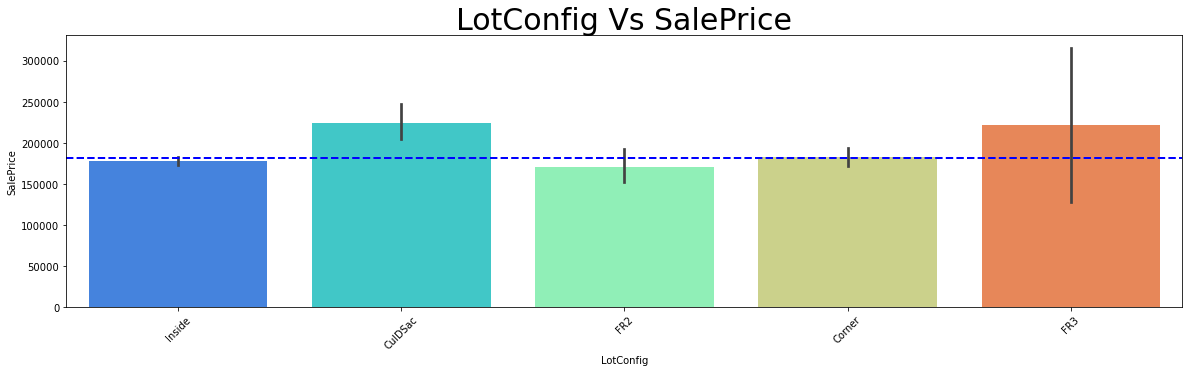

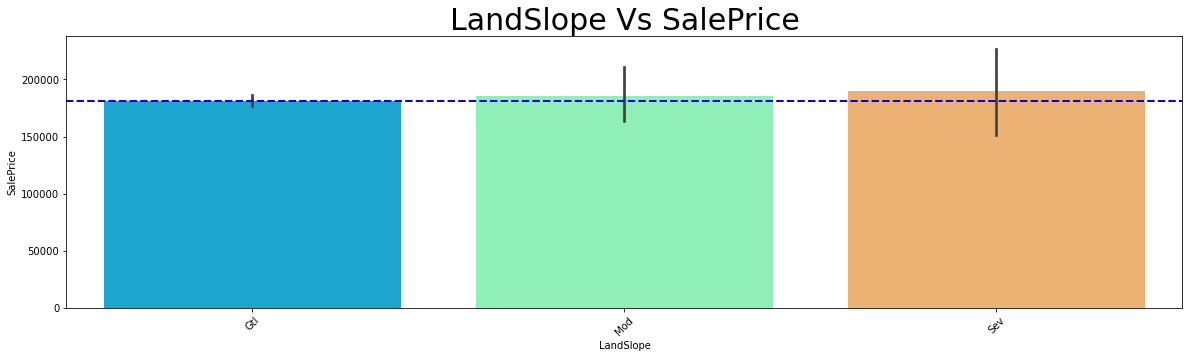

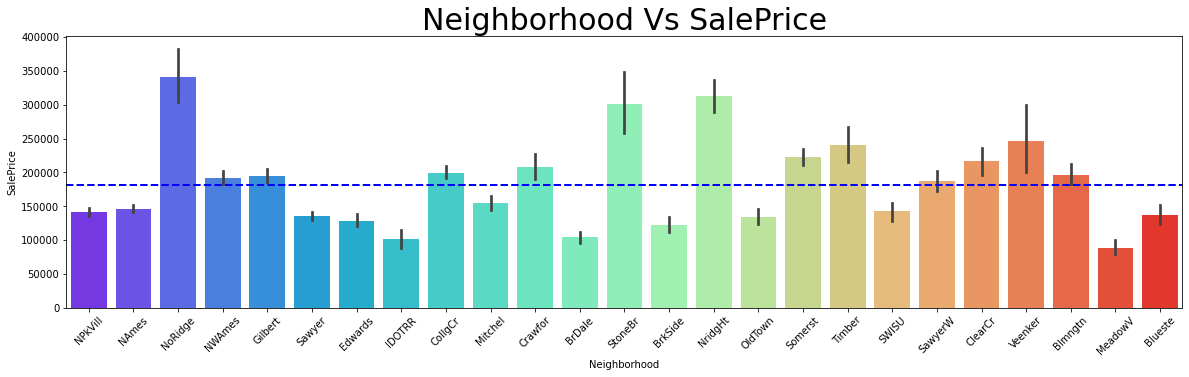

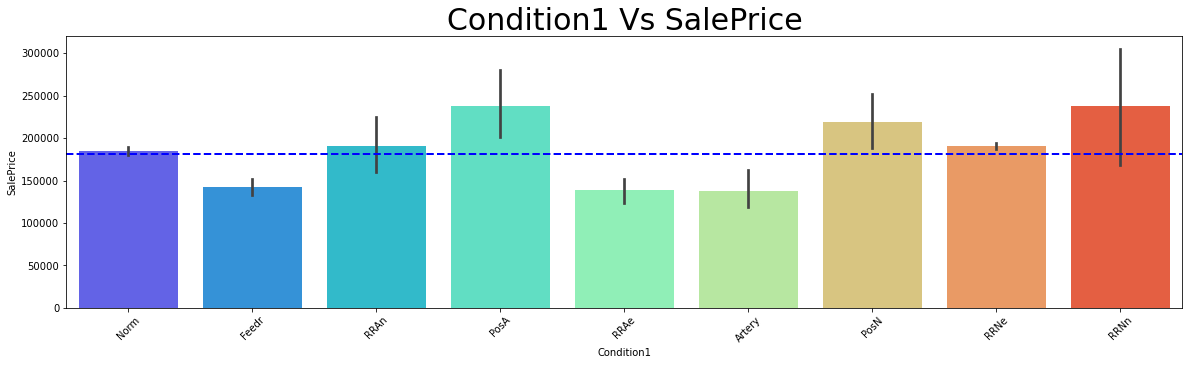

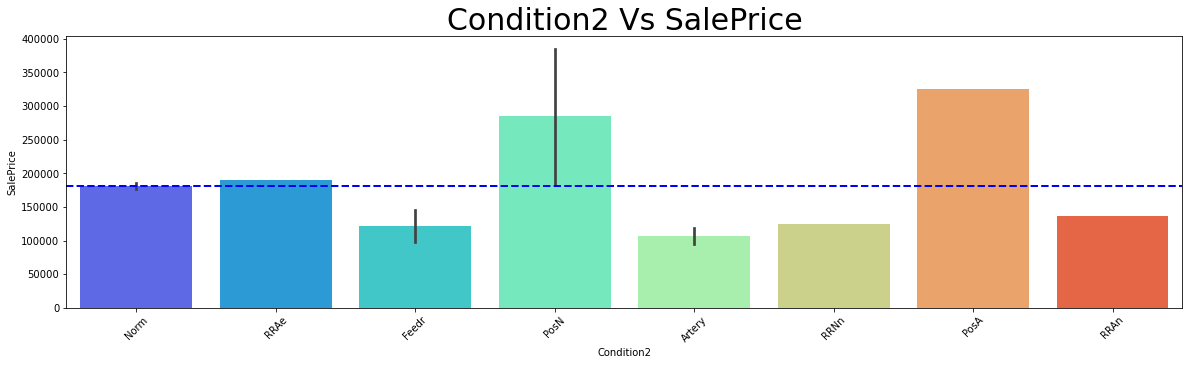

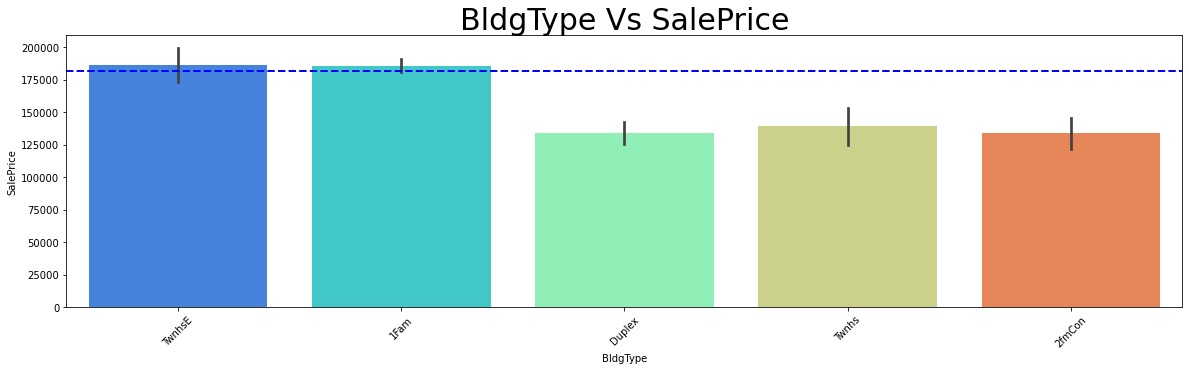

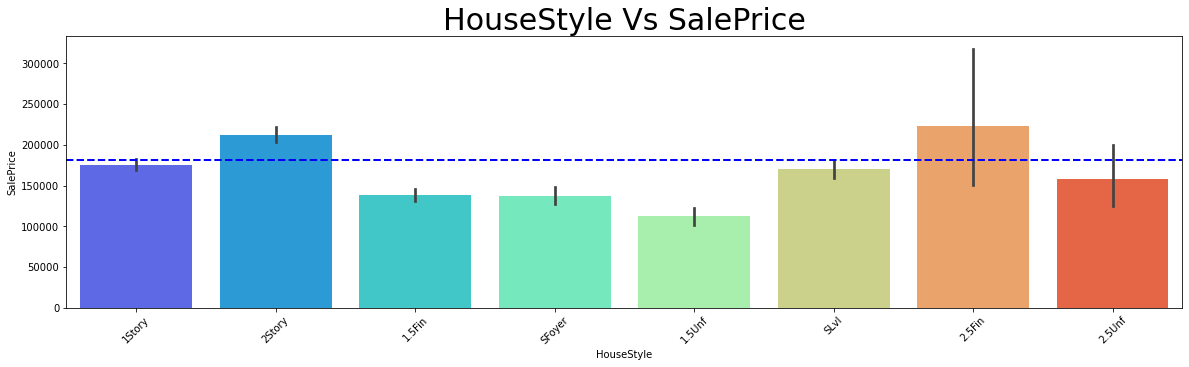

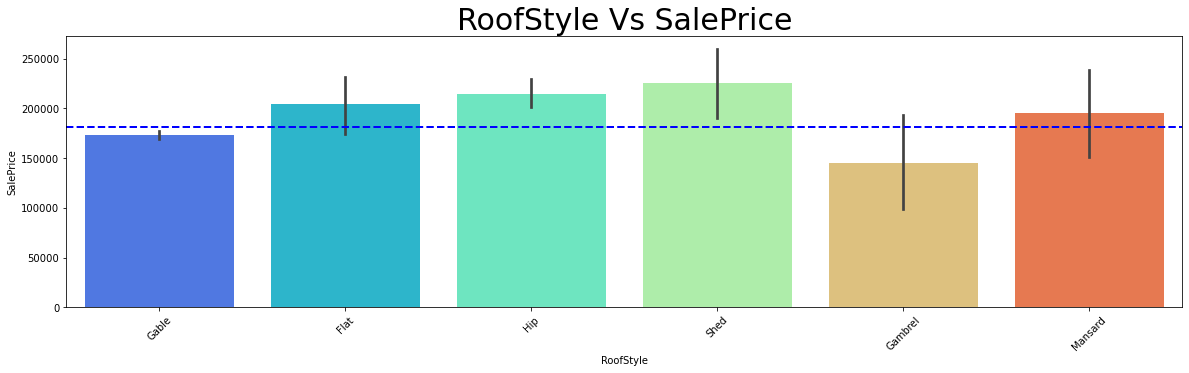

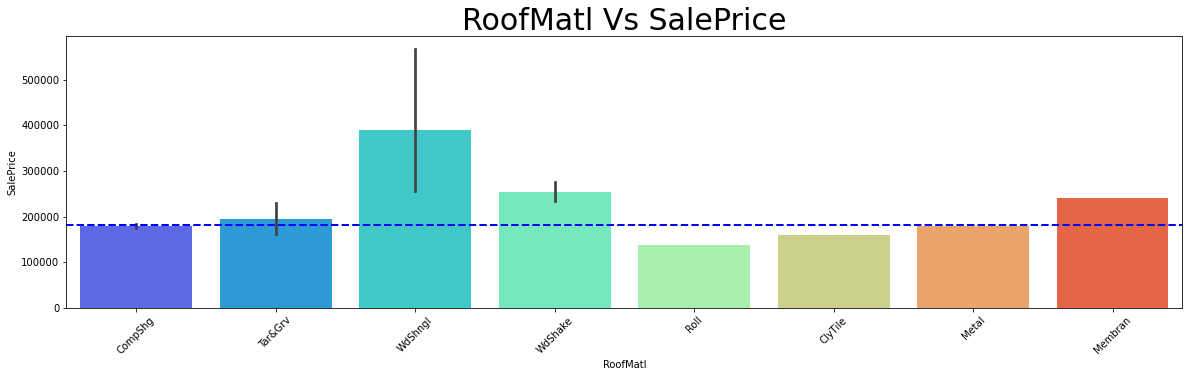

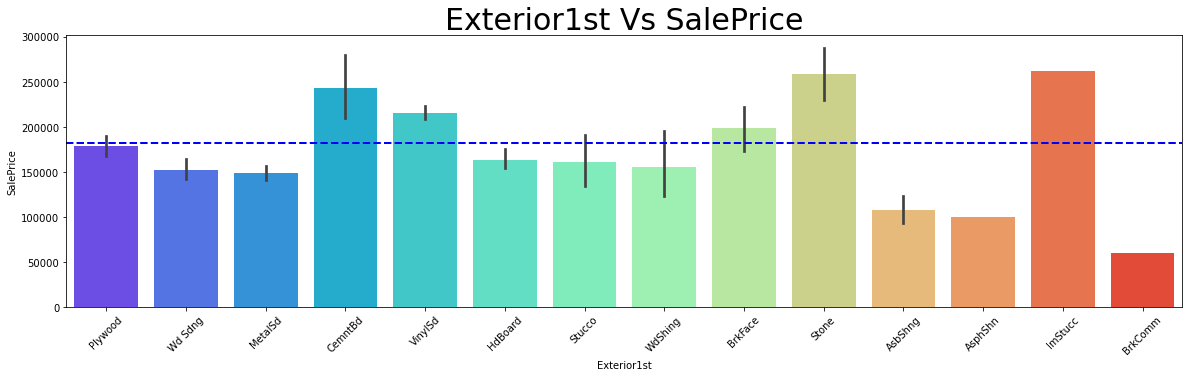

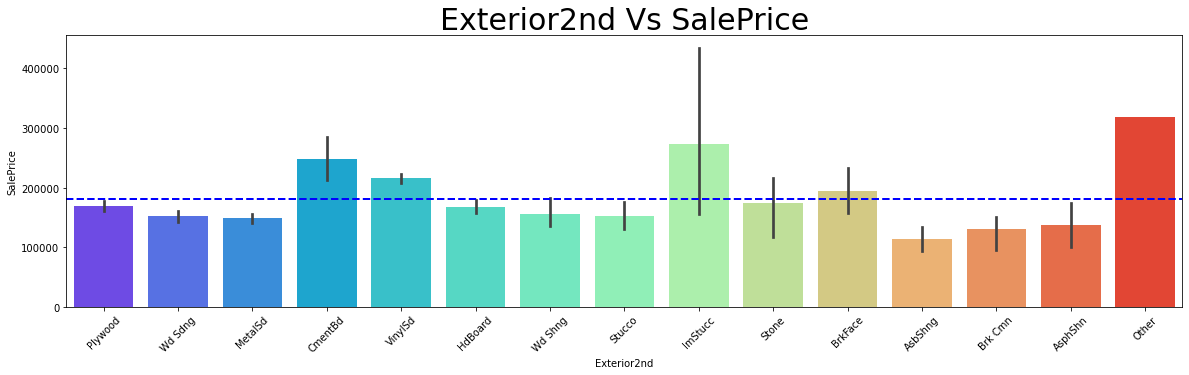

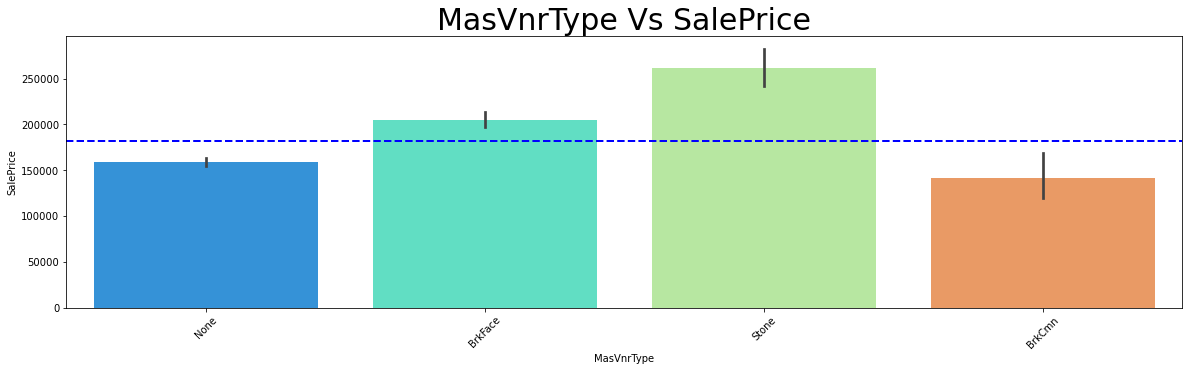

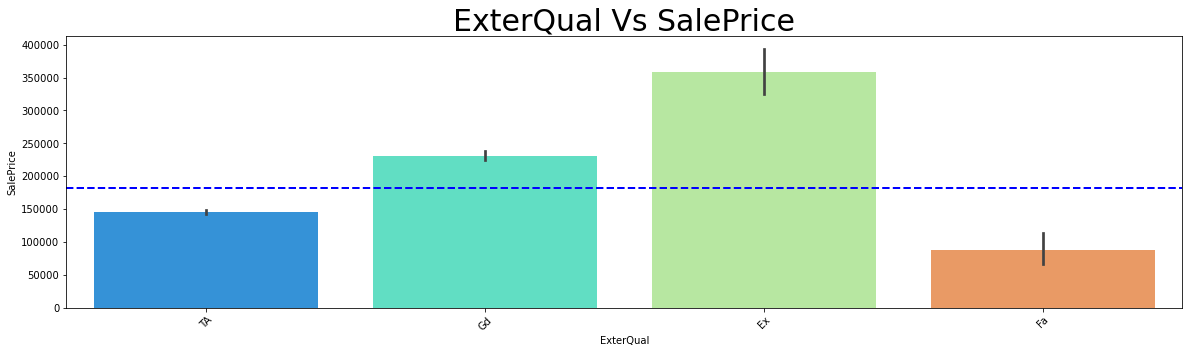

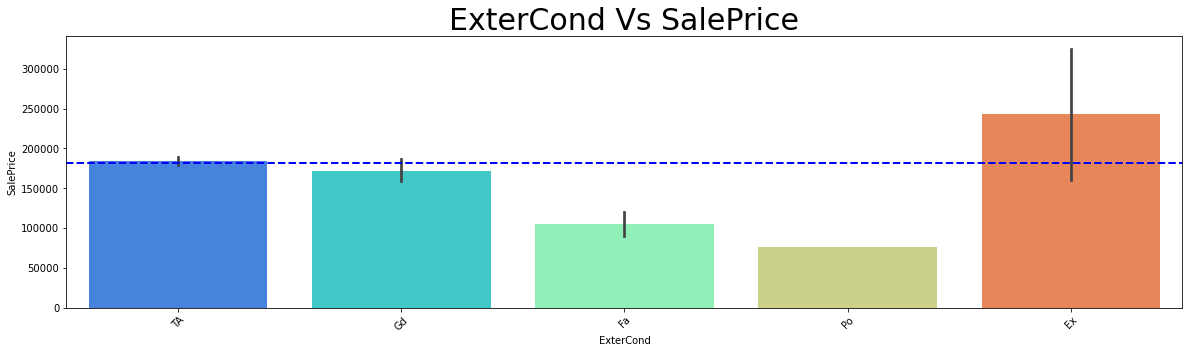

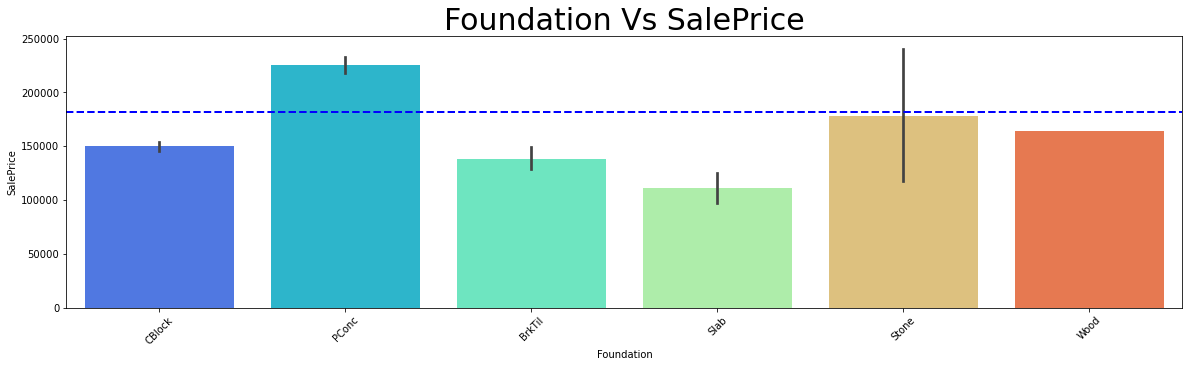

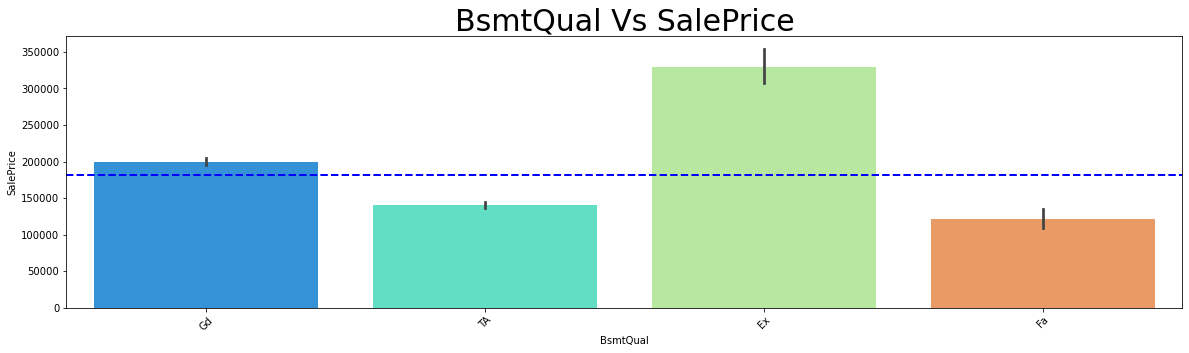

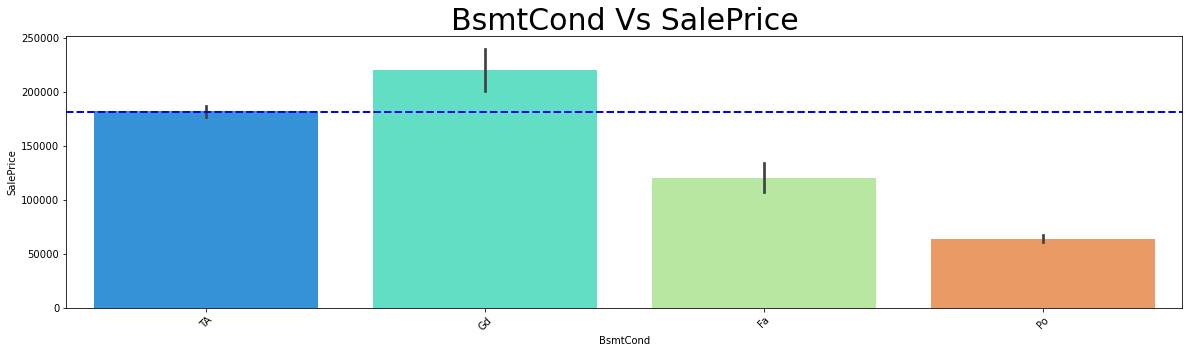

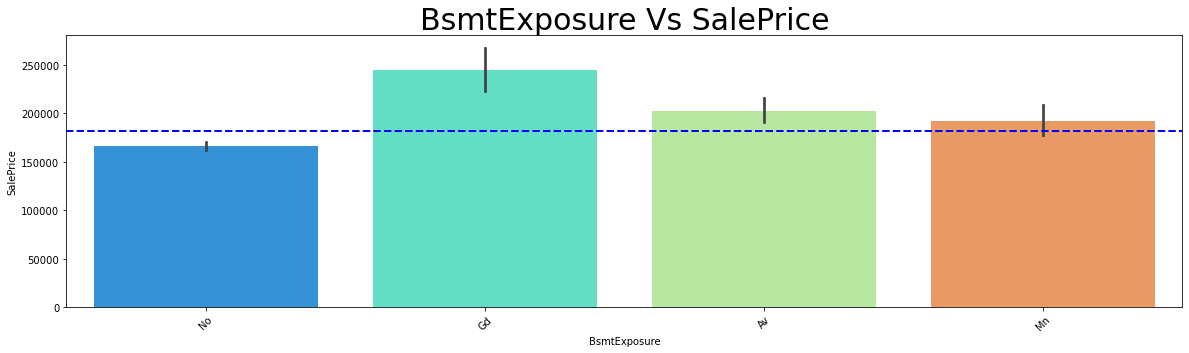

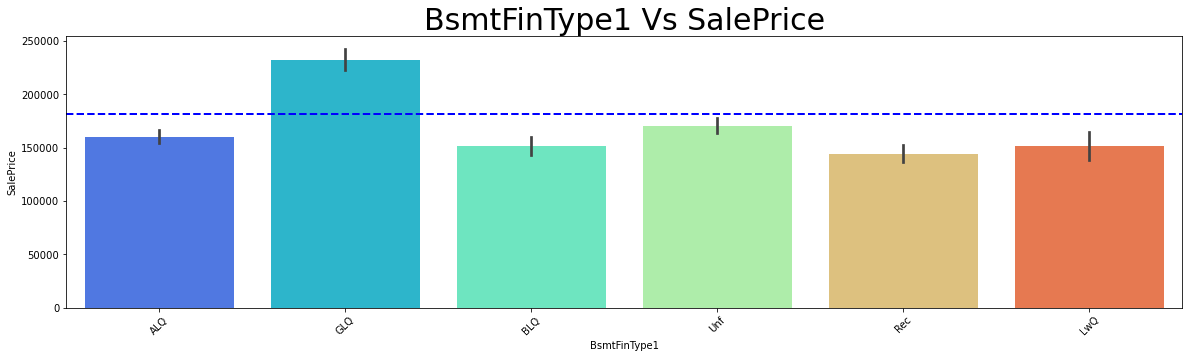

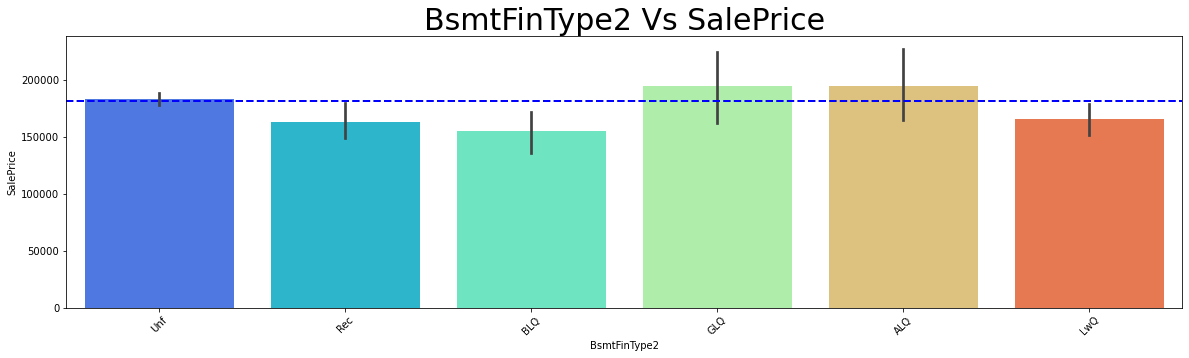

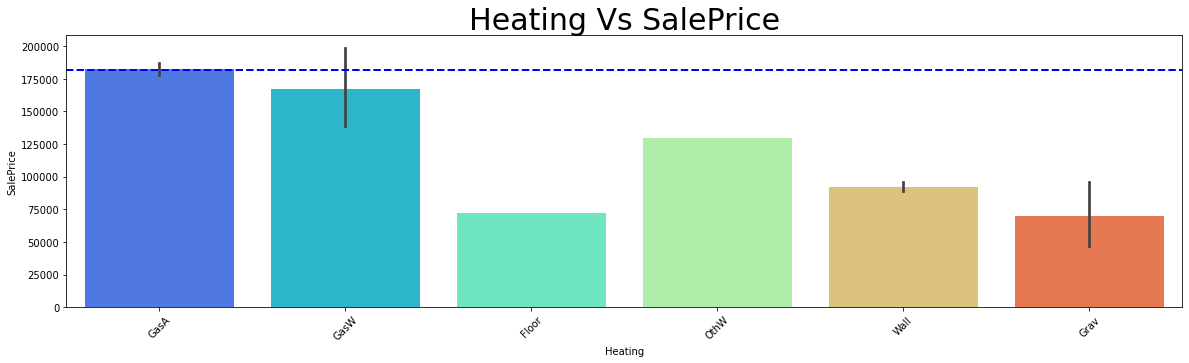

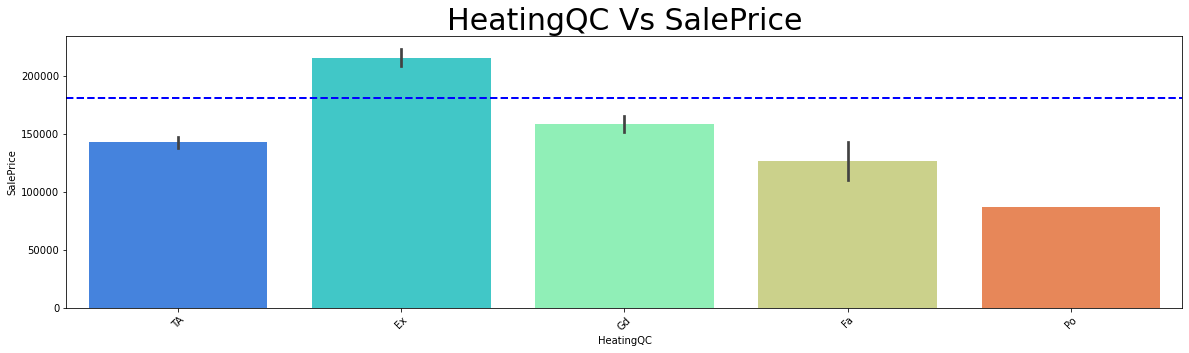

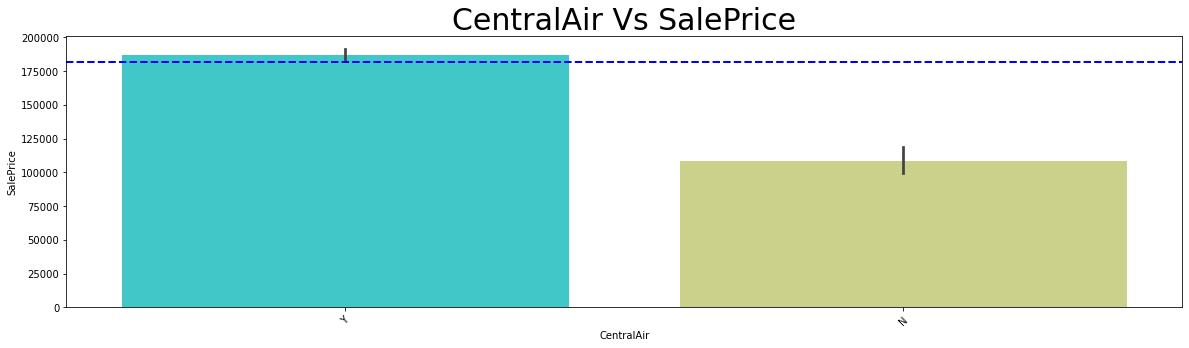

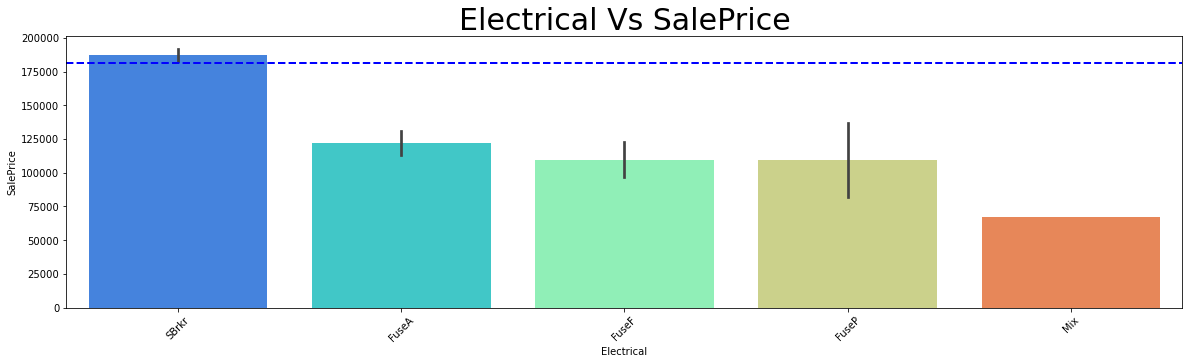

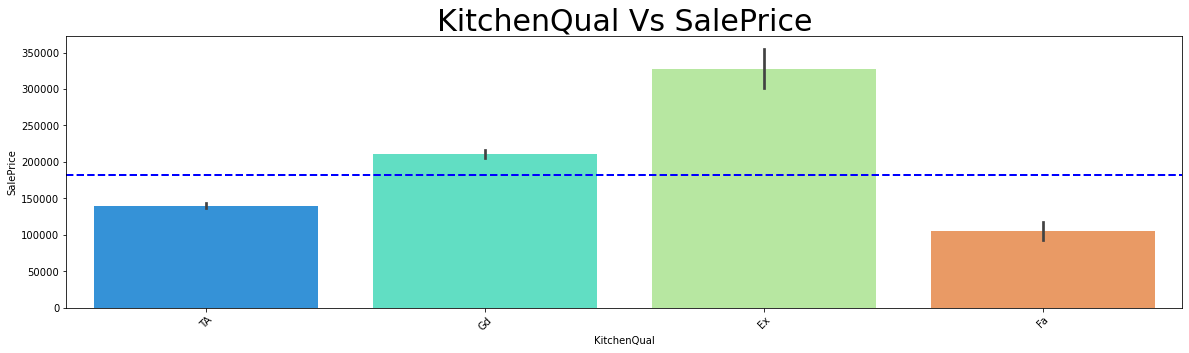

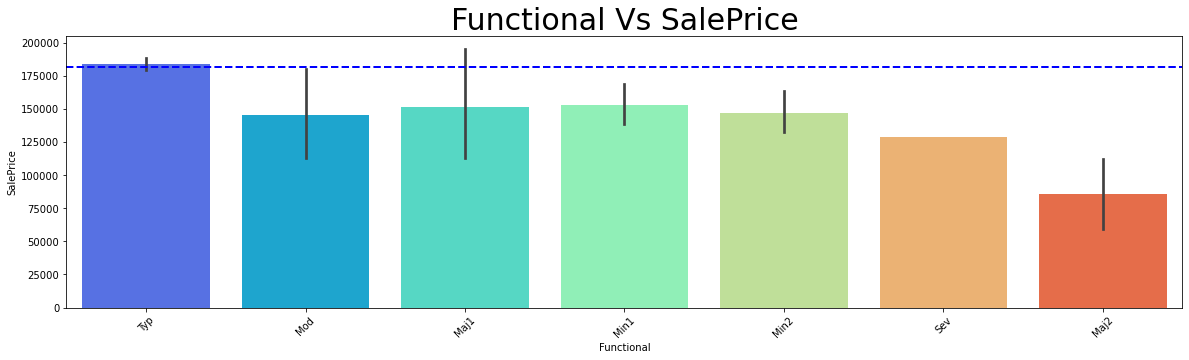

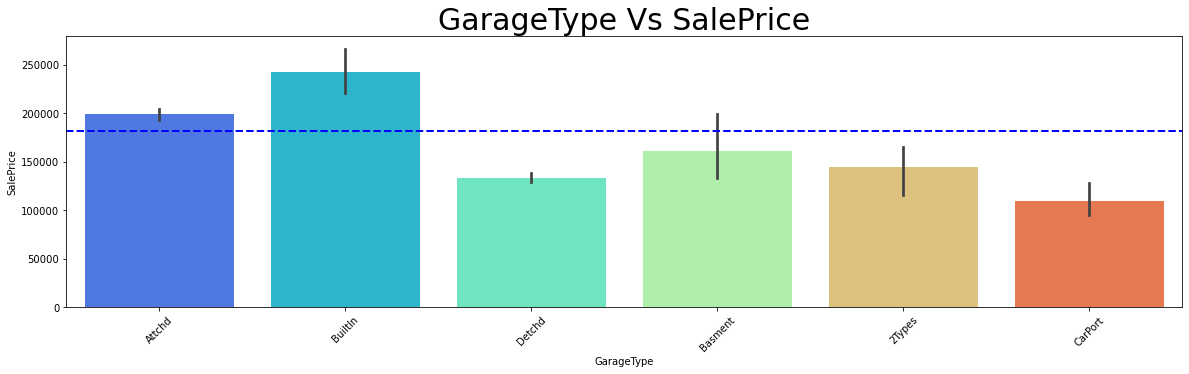

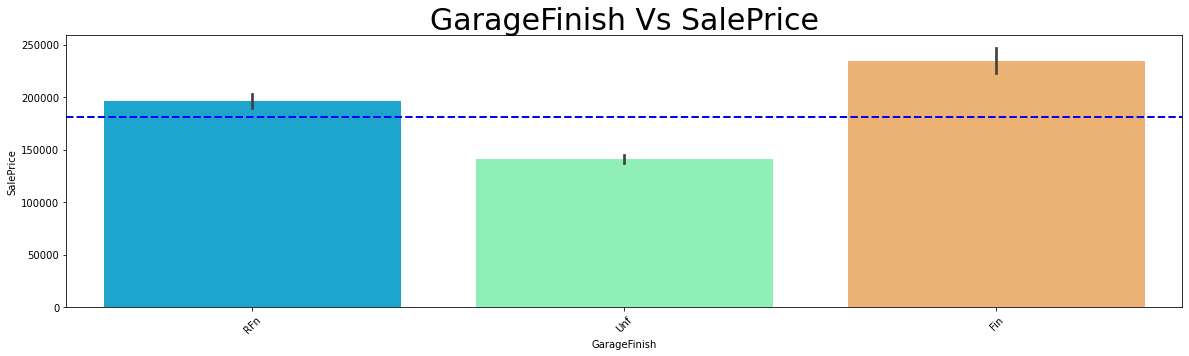

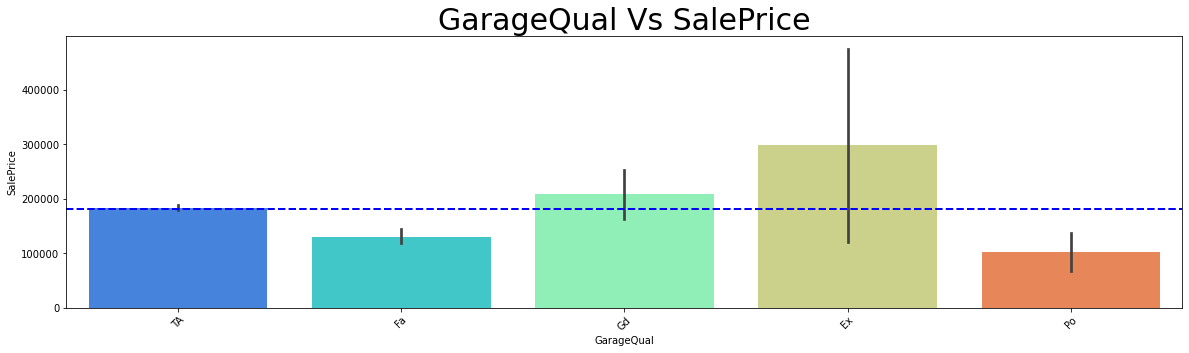

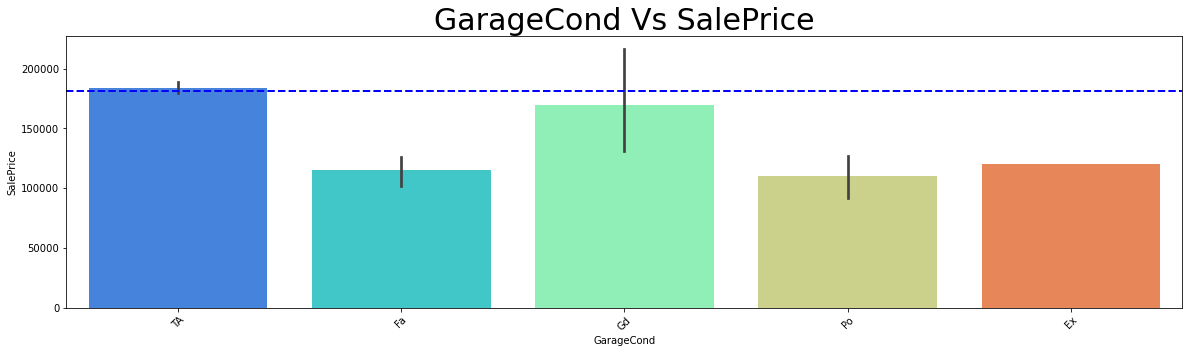

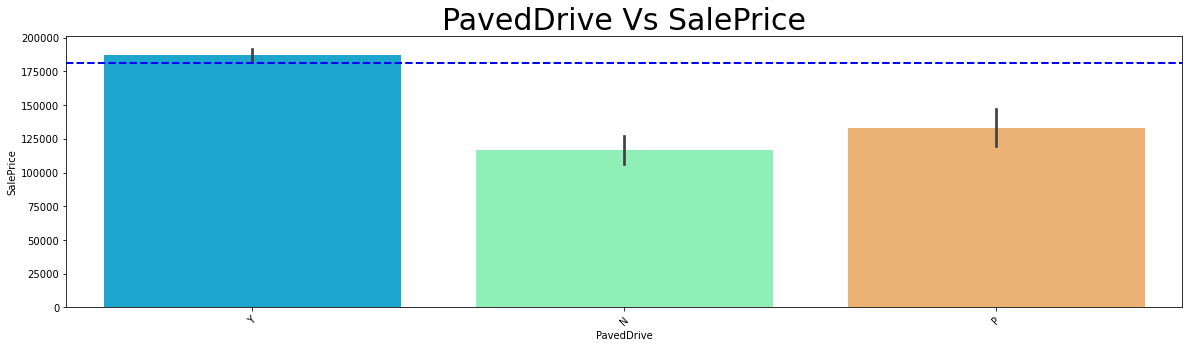

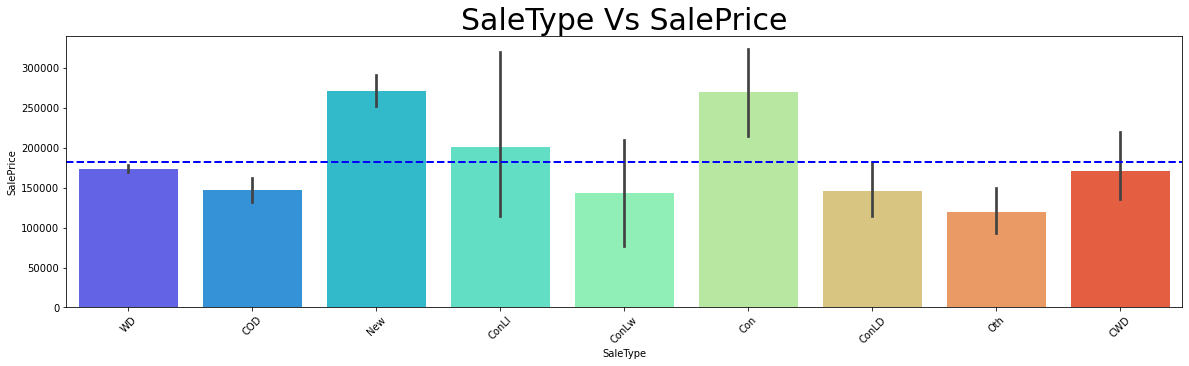

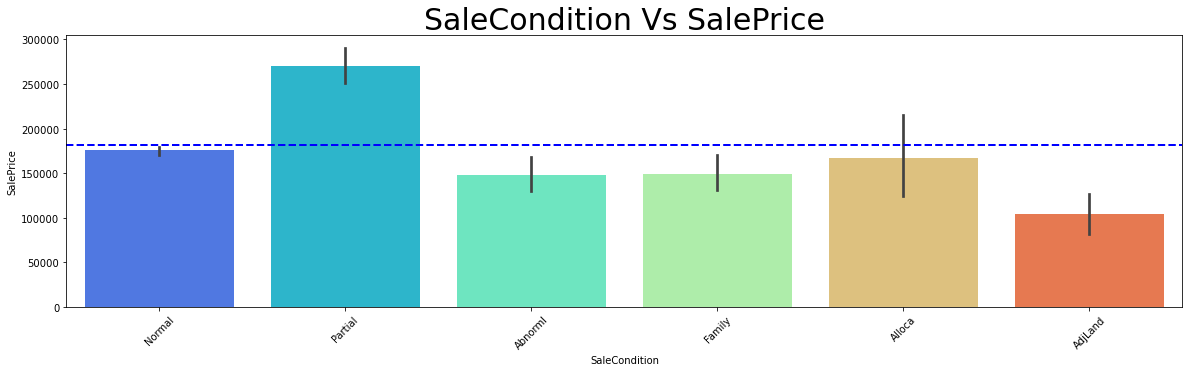

In [31]:
## Visualizing categorical  column data  relation with Target column:

for column in categorical_cols:
    plt.figure(figsize=(20,5))
    mean_cost = np.mean(df_train.SalePrice)
    sns.barplot(x = df_train[column], y = "SalePrice", data = df_train, palette = "rainbow")
    plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
    plt.title(f"{column} Vs SalePrice", fontsize = 30)
    plt.xticks(rotation=45)
    plt.show()

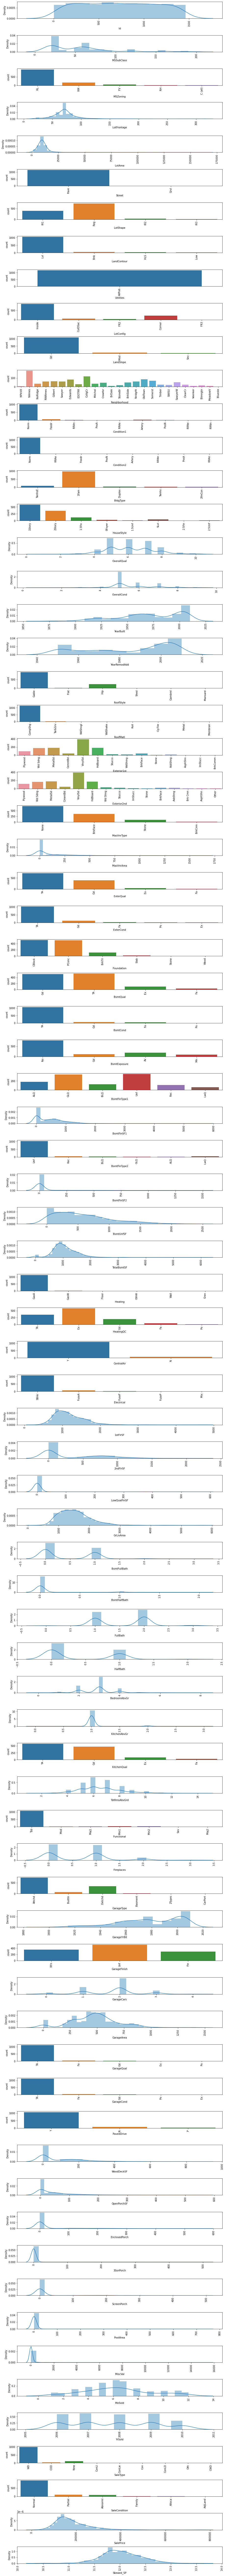

In [33]:
plt.figure(figsize=[15,200])
for i, column_data in enumerate(df_train.dtypes.items()):
    column,dtype = column_data
    plt.subplot(80,1,i+1)
    plt.subplots_adjust(hspace=1)
    
    if dtype == 'object':
        plt.xticks(rotation=90)
        sns.countplot(df_train[column])
    else:
        plt.xticks(rotation=90)
        sns.distplot(df_train[column],kde=True)

Observations:

1.The Data mostly all numeric varaibles are skewed.

2.Sales Condition is Normal and sale type is Warranty DEED-Conventional.

3.Mostly are Paved Drive, Garage Conditions and Garage Quality are Typically/Average.

4.Mostly GarageFinish are unfinished and GarageType is Attached.

5.Mostly Home Functionality is Typical.

6.KitchenQuality is Typically Average.

7.Electrical is Standard Circuit Breakers & Romex.

8.Central Air is Yes.

9.Heating Quality COndition is Excellent.

10.Heating is Gas forced warm air furnished.

11.Basement Finish Type1 is Unfurnished.

12.Basement Finish Type2 is Unfurnished.

13.No Exposure to walkout or garden level walls.

14.VInylSD are mostly used material for rooms.




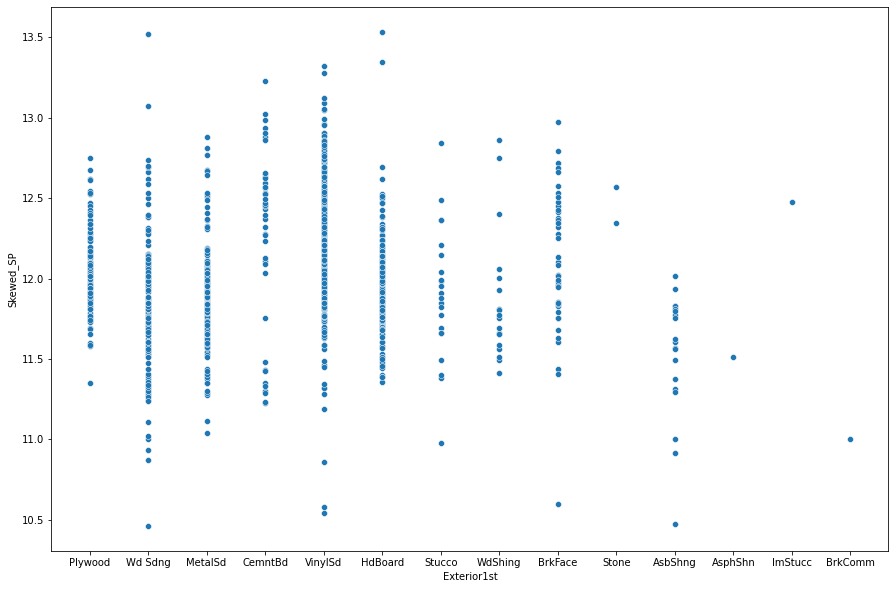

In [35]:
plt.figure(figsize=[15,10])
sns.scatterplot(x='Exterior1st',y='Skewed_SP',data=df_train)
plt.show()

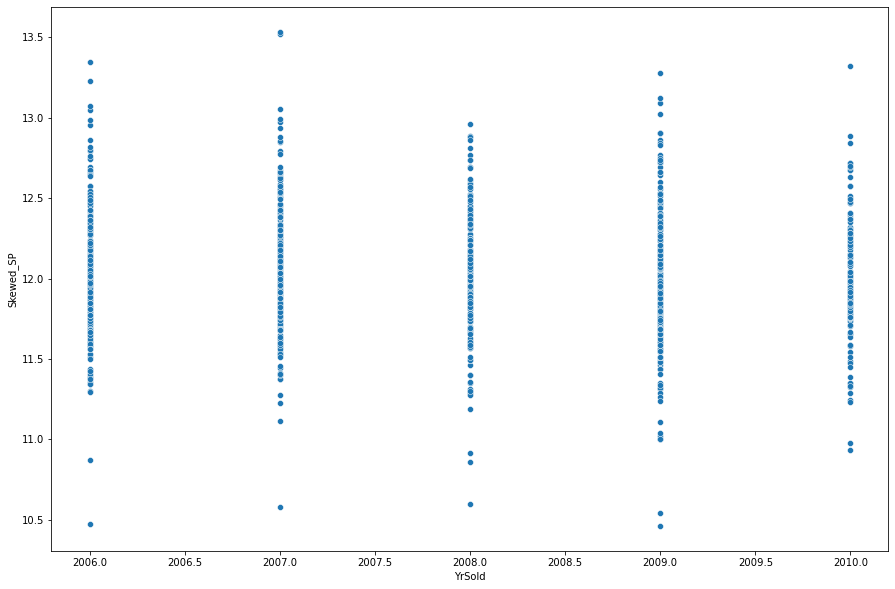

In [36]:
plt.figure(figsize=[15,10])
sns.scatterplot(x='YrSold',y='Skewed_SP',data=df_train)
plt.show()

In [37]:
df_train.OverallQual.unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10])

In [38]:
#Creating a pivot table 
quality_pivot = df_train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

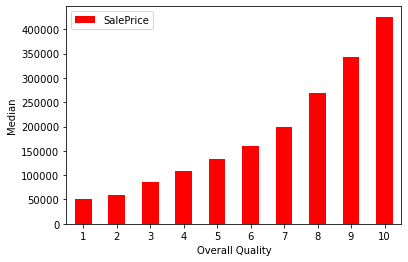

In [40]:
quality_pivot.plot(kind='bar',color='r')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

If Quality Increases than Sales Price also increases.

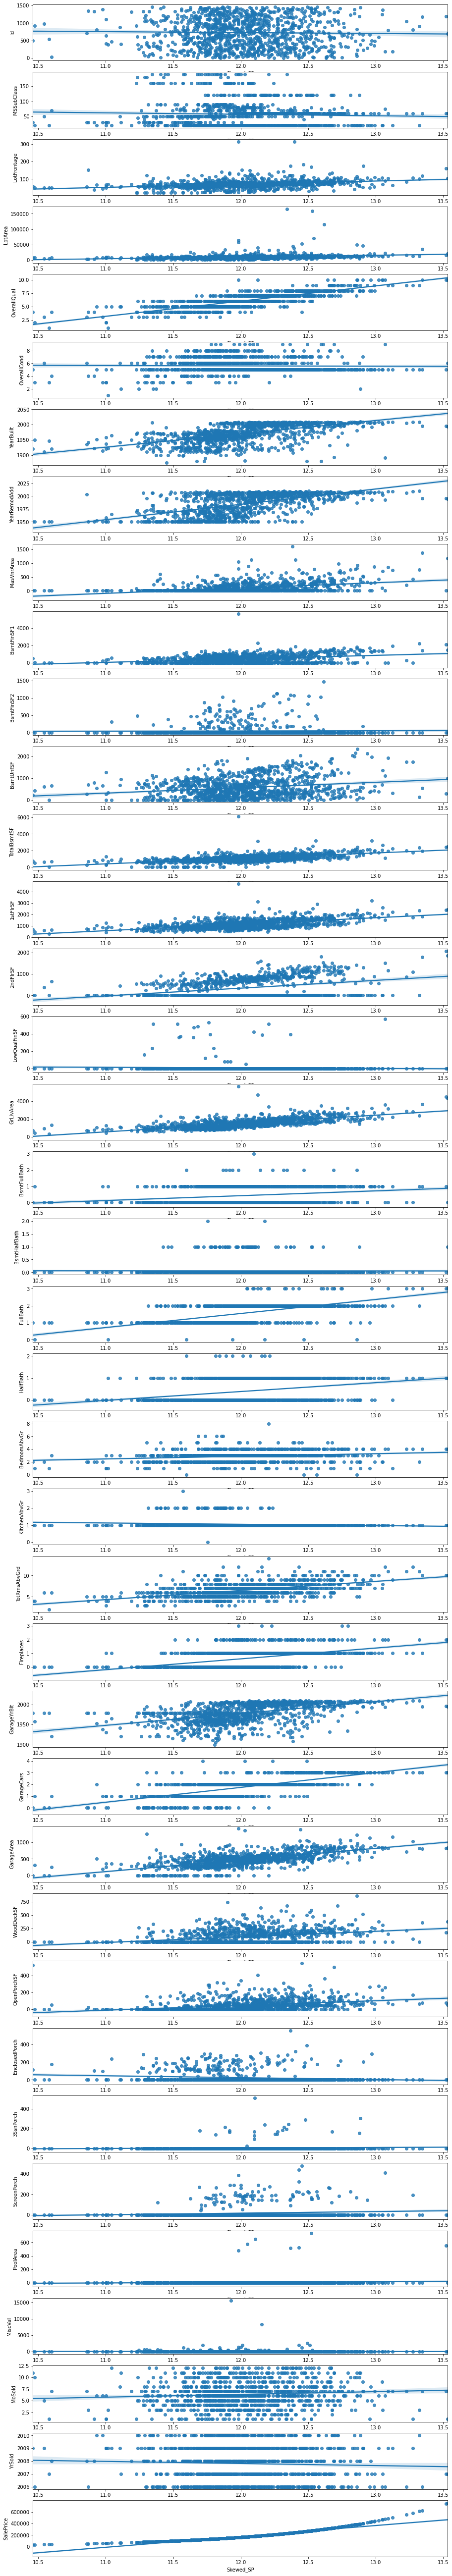

In [41]:
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df_train.drop('Skewed_SP',axis=1).dtypes.items():
    if dtype != 'object':
        plt.subplot(80,1,j+1)    
        sns.regplot(df_train['Skewed_SP'],df_train[column],)
        j += 1

As per the Analysis of the data there are so many outliers and most of the data is directly proportional.

In [42]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
for i in df_train.columns:
    df_train[i]=le.fit_transform(df_train[i])
    df_train

In [44]:
for i in df_test.columns:
    df_test[i]=le.fit_transform(df_test[i])
    df_test

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1168 non-null   int64
 1   MSSubClass     1168 non-null   int64
 2   MSZoning       1168 non-null   int64
 3   LotFrontage    1168 non-null   int64
 4   LotArea        1168 non-null   int64
 5   Street         1168 non-null   int64
 6   LotShape       1168 non-null   int64
 7   LandContour    1168 non-null   int64
 8   Utilities      1168 non-null   int64
 9   LotConfig      1168 non-null   int64
 10  LandSlope      1168 non-null   int64
 11  Neighborhood   1168 non-null   int64
 12  Condition1     1168 non-null   int64
 13  Condition2     1168 non-null   int64
 14  BldgType       1168 non-null   int64
 15  HouseStyle     1168 non-null   int64
 16  OverallQual    1168 non-null   int64
 17  OverallCond    1168 non-null   int64
 18  YearBuilt      1168 non-null   int64
 19  YearRe

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             292 non-null    int64
 1   MSSubClass     292 non-null    int64
 2   MSZoning       292 non-null    int64
 3   LotFrontage    292 non-null    int64
 4   LotArea        292 non-null    int64
 5   Street         292 non-null    int64
 6   LotShape       292 non-null    int64
 7   LandContour    292 non-null    int64
 8   Utilities      292 non-null    int64
 9   LotConfig      292 non-null    int64
 10  LandSlope      292 non-null    int64
 11  Neighborhood   292 non-null    int64
 12  Condition1     292 non-null    int64
 13  Condition2     292 non-null    int64
 14  BldgType       292 non-null    int64
 15  HouseStyle     292 non-null    int64
 16  OverallQual    292 non-null    int64
 17  OverallCond    292 non-null    int64
 18  YearBuilt      292 non-null    int64
 19  YearRemo

In [48]:
df_train.describe(include='all')

Id   MSSubClass     MSZoning  LotFrontage      LotArea  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    583.500000     4.166096     3.013699    40.920377   414.643836   
std     337.316864     4.139986     0.633120    18.812920   249.993254   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     291.750000     0.000000     3.000000    30.000000   197.750000   
50%     583.500000     4.000000     3.000000    41.000000   407.500000   
75%     875.250000     6.000000     3.000000    50.250000   618.250000   
max    1167.000000    14.000000     4.000000   106.000000   891.000000   

            Street     LotShape  LandContour  Utilities    LotConfig  ...  \
count  1168.000000  1168.000000  1168.000000     1168.0  1168.000000  ...   
mean      0.996575     1.938356     2.773973        0.0     3.004281  ...   
std       0.058445     1.412262     0.710027        0.0     1.642667  ...   
min       0.000000     0.000000     0.000000        0.0     0.000000  ...   
25%       1.000000     0.000000     3.000000        0.0     2.000000  ...   
50%       1.000000     3.000000     3.000000        0.0     4.000000  ...   
75%       1.000000     3.000000     3.000000        0.0     4.000000  ...   
max       1.000000     3.000000     3.000000        0.0     4.000000  ...   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      0.166952     2.630993     0.023973     0.299658     5.344178   
std       1.351138    10.103236     0.345529     1.834432     2.686352   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     4.000000   
50%       0.000000     0.000000     0.000000     0.000000     5.000000   
75%       0.000000     0.000000     0.000000     0.000000     7.000000   
max      17.000000    64.000000     7.000000    19.000000    11.000000   

            YrSold     SaleType  SaleCondition    SalePrice    Skewed_SP  
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000  
mean      1.804795     7.465753       3.768836   261.805651   261.805651  
std       1.329738     1.619459       1.112208   149.862407   149.862407  
min       0.000000     0.000000       0.000000     0.000000     0.000000  
25%       1.000000     8.000000       4.000000   137.750000   137.750000  
50%       2.000000     8.000000       4.000000   245.500000   245.500000  
75%       3.000000     8.000000       4.000000   379.000000   379.000000  
max       4.000000     8.000000       5.000000   580.000000   580.000000  

[8 rows x 77 columns]

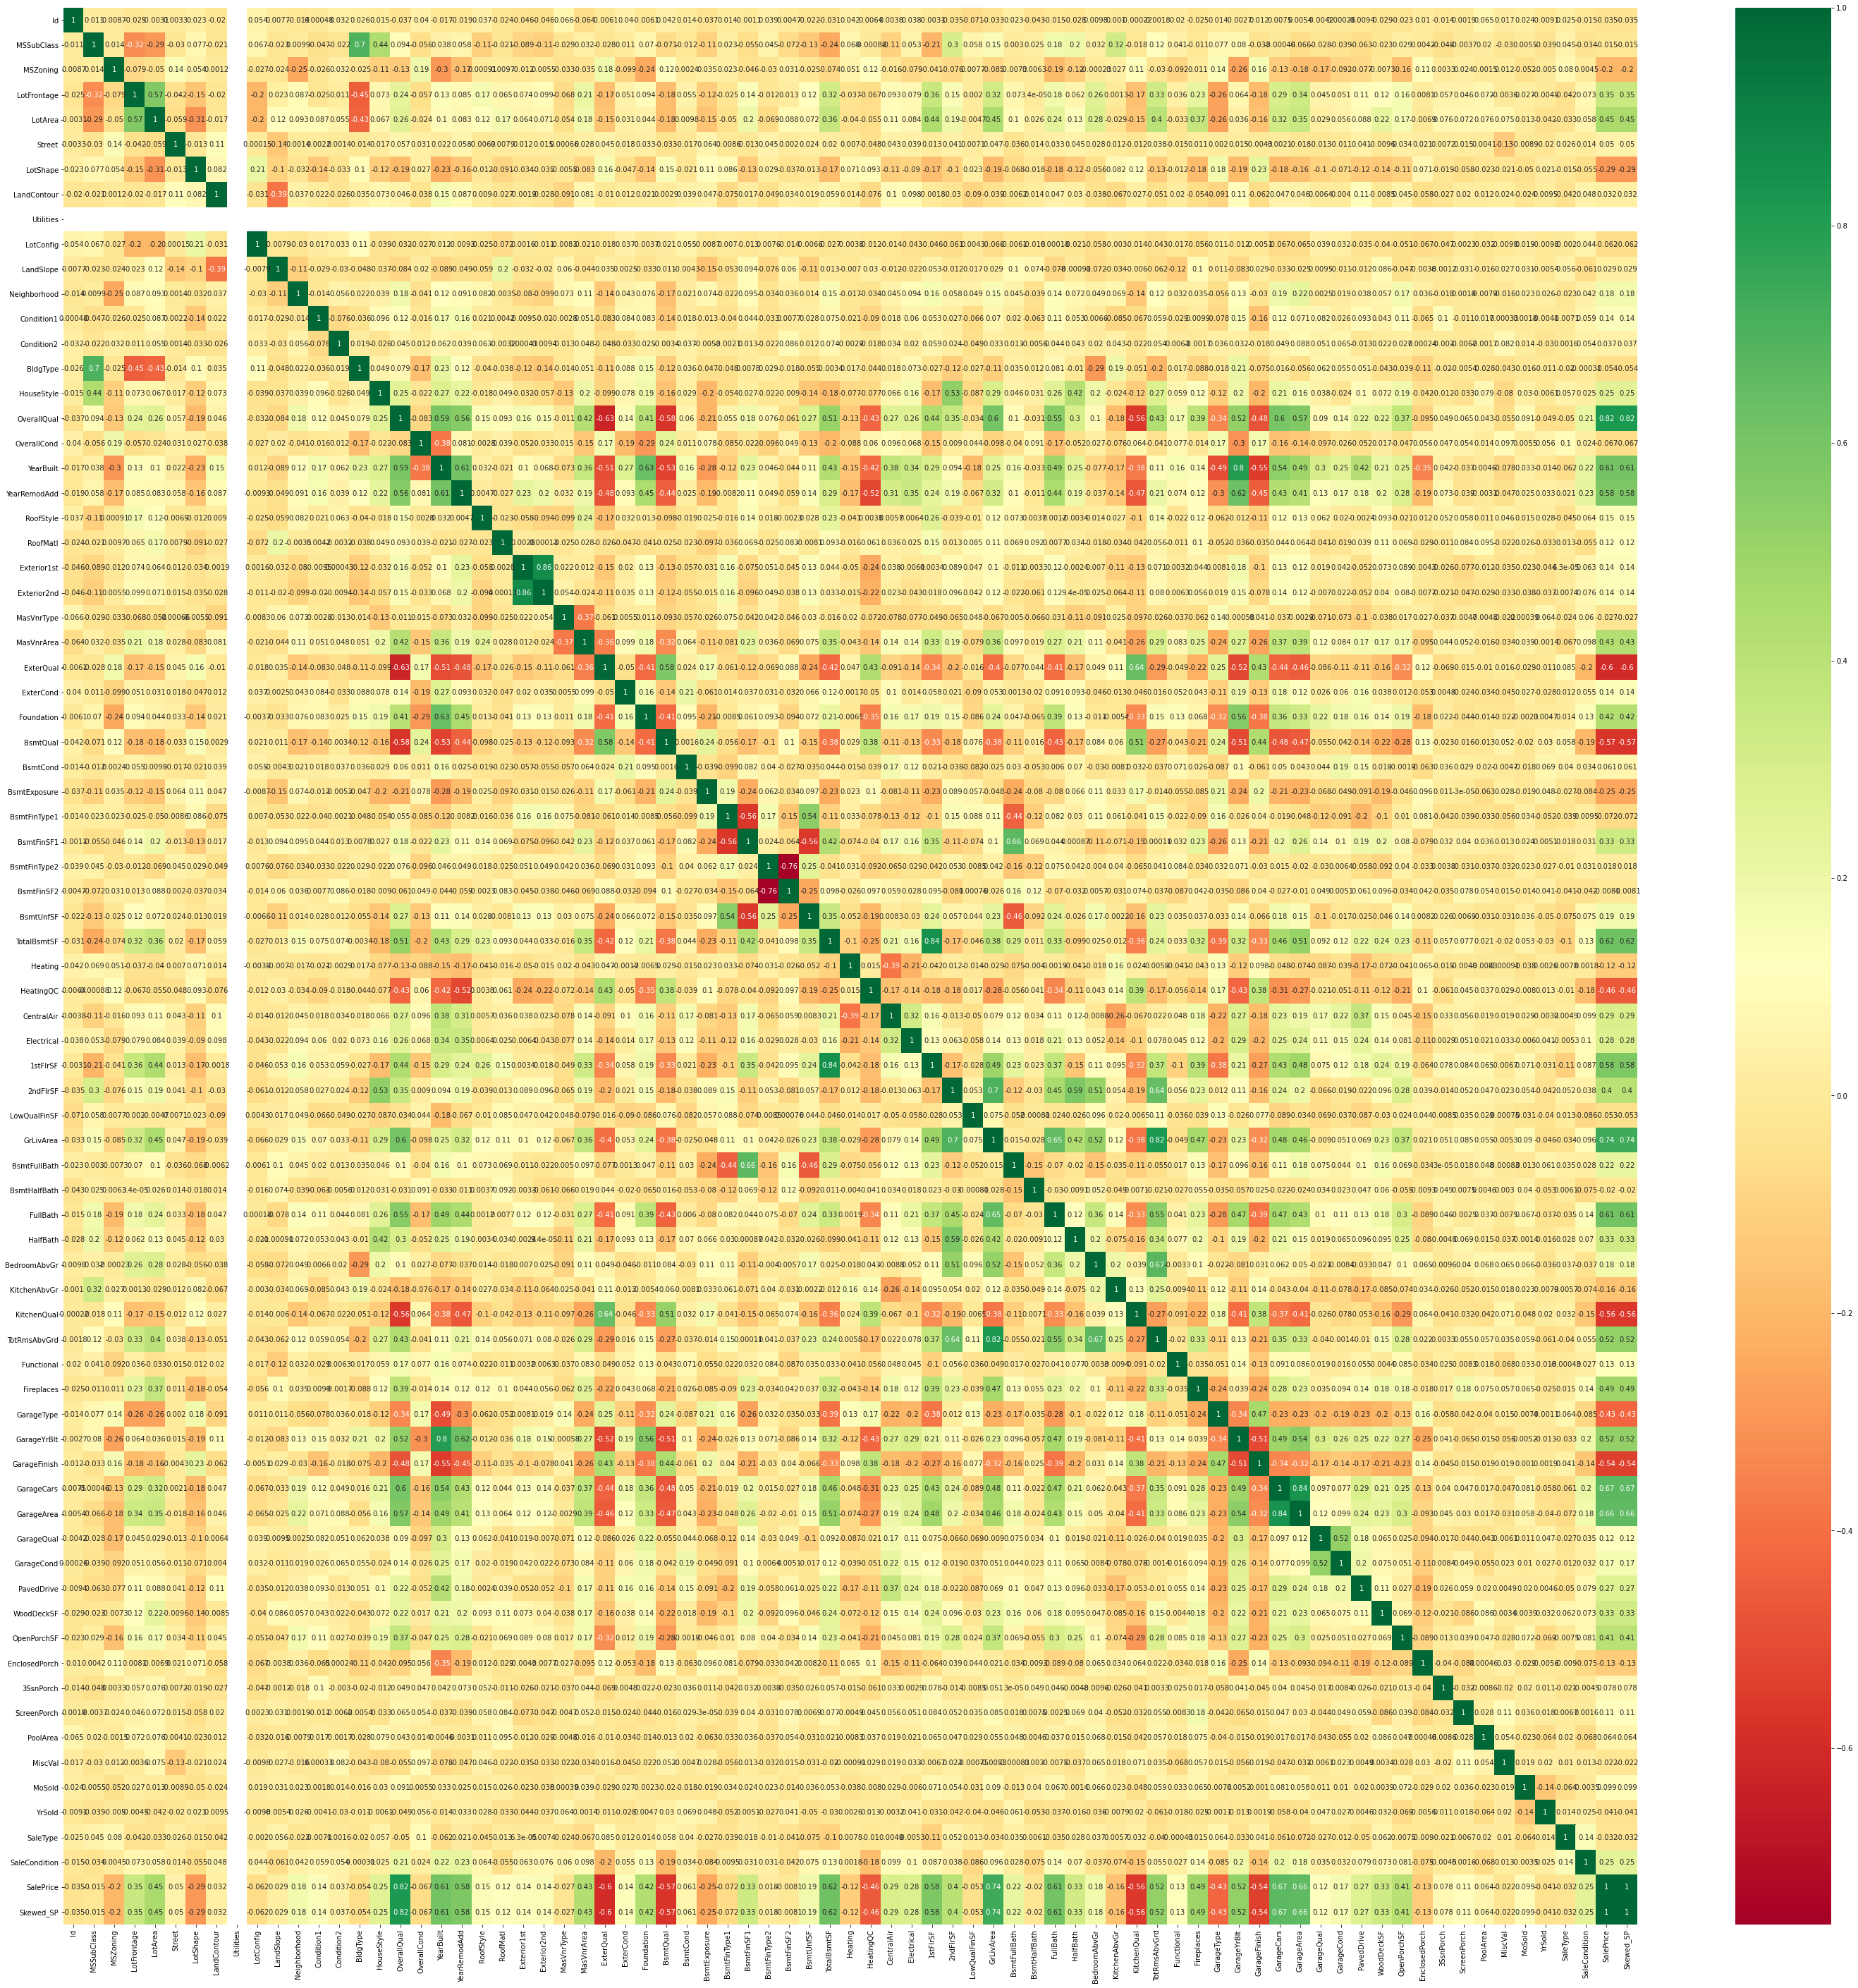

In [46]:
plt.figure(figsize = (50,50))
sns.heatmap(df_train.corr(),cmap = 'RdYlGn',annot = True)
plt.show()

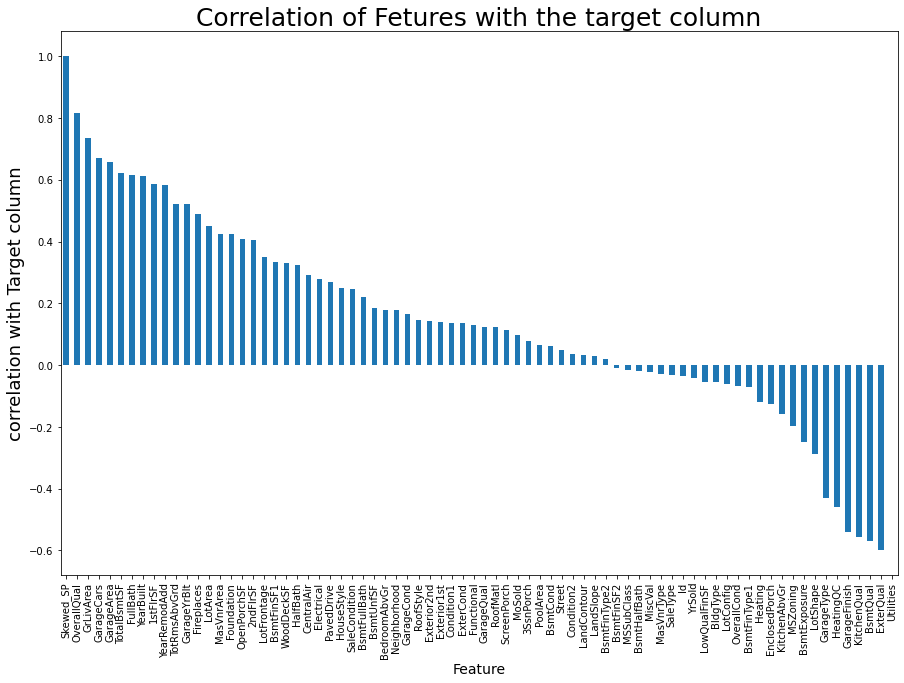

KEY OBSERVATIONS:
 


SalePrice
Skewed_SP      1.000000
OverallQual    0.817104
GrLivArea      0.735553
GarageCars     0.669420
GarageArea     0.658957
...                 ...
GarageFinish  -0.540406
KitchenQual   -0.557568
BsmtQual      -0.570493
ExterQual     -0.599561
Utilities           NaN

[76 rows x 1 columns]

In [49]:
plt.figure(figsize=(15,10))
df_train.corr()["SalePrice"].sort_values(ascending=False).drop(["SalePrice"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
corr=pd.DataFrame(df_train.corr()["SalePrice"].sort_values(ascending=False)).drop(["SalePrice"])
print("KEY OBSERVATIONS:\n ")
corr

In [50]:
corr.head(30)

SalePrice
Skewed_SP       1.000000
OverallQual     0.817104
GrLivArea       0.735553
GarageCars      0.669420
GarageArea      0.658957
TotalBsmtSF     0.621147
FullBath        0.614222
YearBuilt       0.611207
1stFlrSF        0.584956
YearRemodAdd    0.583555
TotRmsAbvGrd    0.522691
GarageYrBlt     0.521532
Fireplaces      0.489372
LotArea         0.449715
MasVnrArea      0.425397
Foundation      0.424412
OpenPorchSF     0.406815
2ndFlrSF        0.404256
LotFrontage     0.349837
BsmtFinSF1      0.332347
WoodDeckSF      0.329477
HalfBath        0.325391
CentralAir      0.291834
Electrical      0.277493
PavedDrive      0.270185
HouseStyle      0.250300
SaleCondition   0.245379
BsmtFullBath    0.220856
BsmtUnfSF       0.185762
BedroomAbvGr    0.179225

In [51]:
corr.tail(30)

SalePrice
Condition2      0.036872
LandContour     0.032355
LandSlope       0.029216
BsmtFinType2    0.018298
BsmtFinSF2     -0.008125
MSSubClass     -0.015062
BsmtHalfBath   -0.019503
MiscVal        -0.021931
MasVnrType     -0.027325
SaleType       -0.032473
Id             -0.034556
YrSold         -0.041436
LowQualFinSF   -0.053078
BldgType       -0.053989
LotConfig      -0.061521
OverallCond    -0.066726
BsmtFinType1   -0.071760
Heating        -0.118868
EnclosedPorch  -0.126661
KitchenAbvGr   -0.156678
MSZoning       -0.198318
BsmtExposure   -0.247330
LotShape       -0.287903
GarageType     -0.429223
HeatingQC      -0.459293
GarageFinish   -0.540406
KitchenQual    -0.557568
BsmtQual       -0.570493
ExterQual      -0.599561
Utilities            NaN

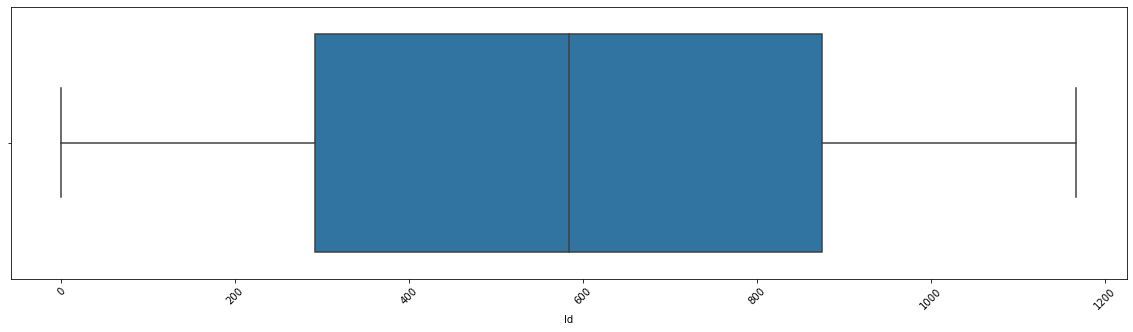

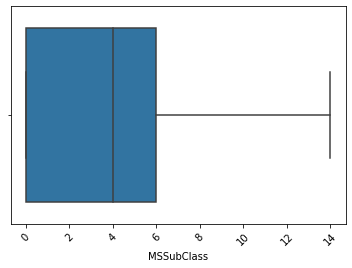

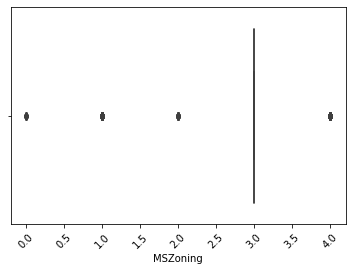

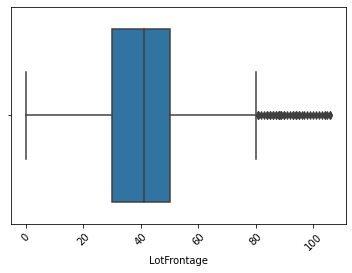

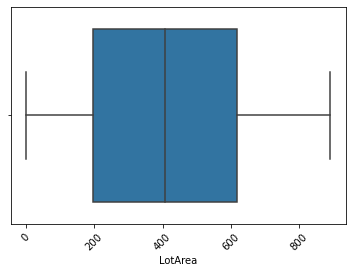

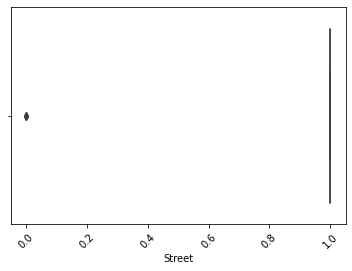

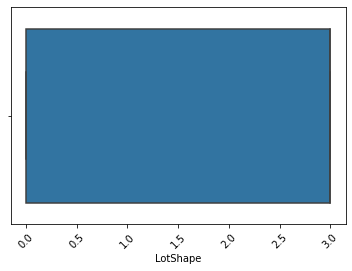

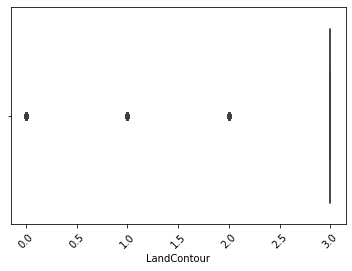

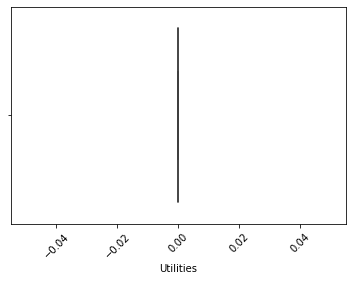

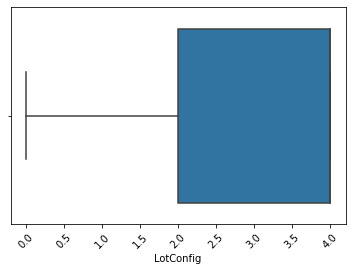

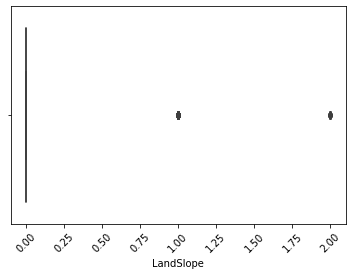

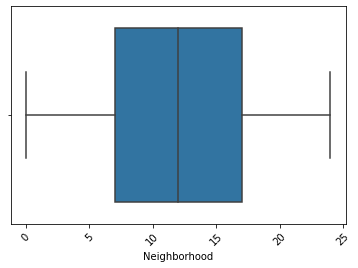

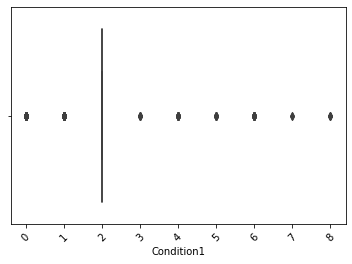

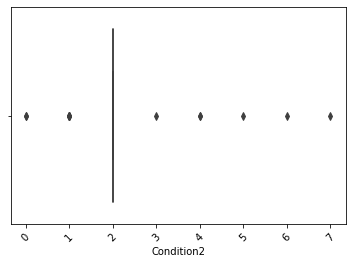

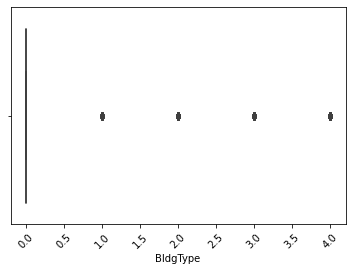

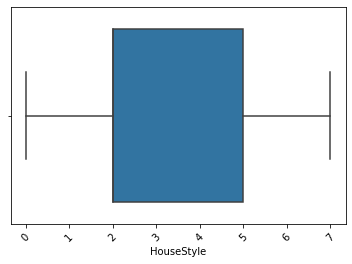

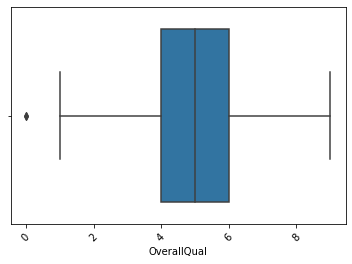

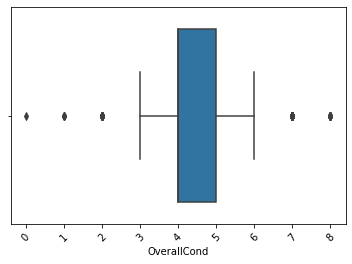

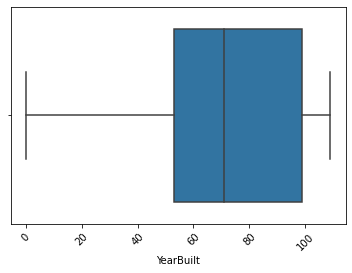

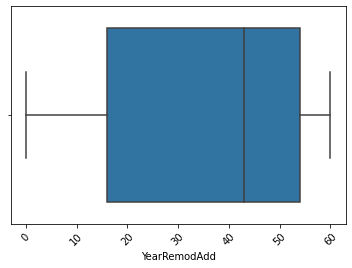

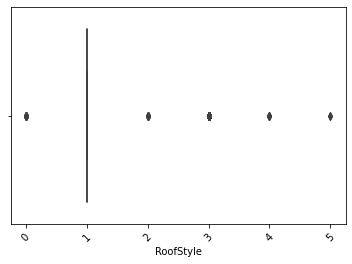

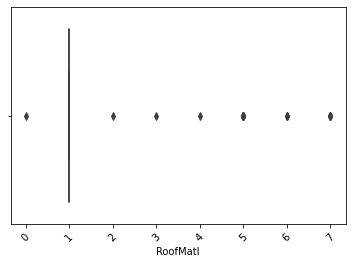

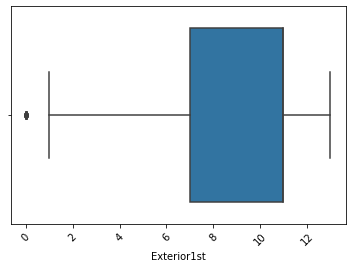

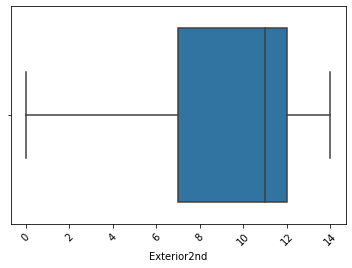

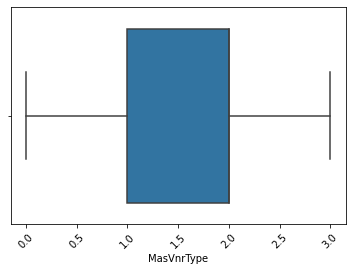

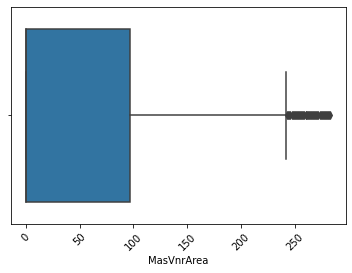

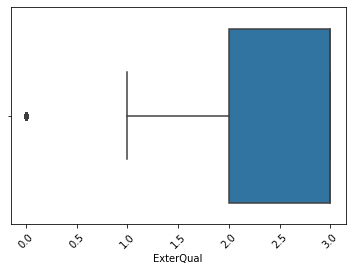

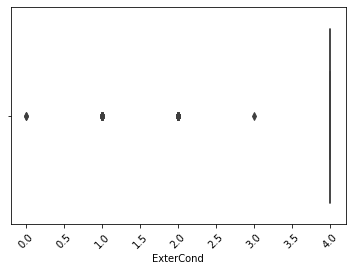

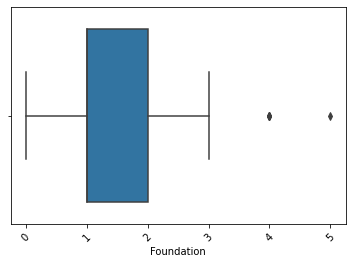

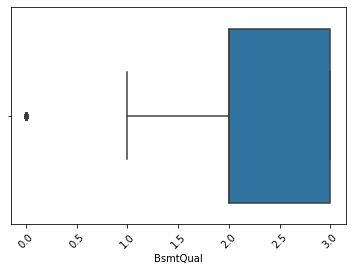

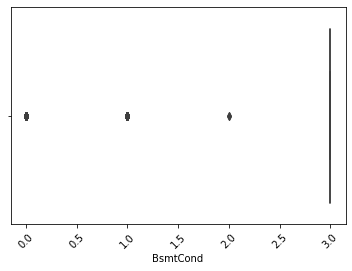

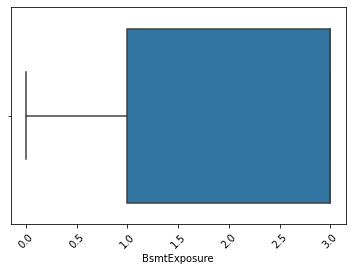

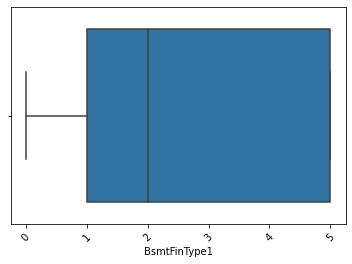

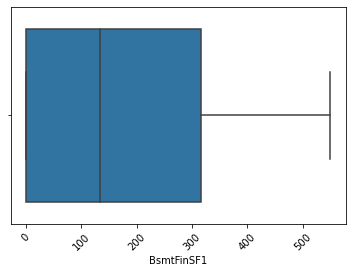

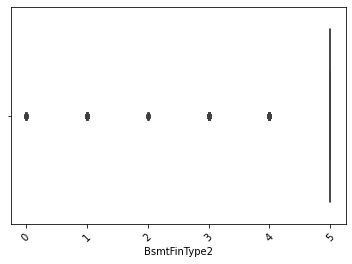

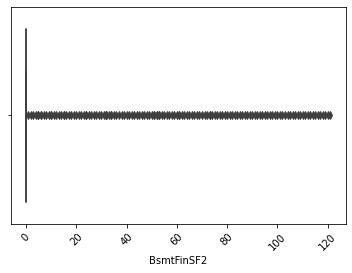

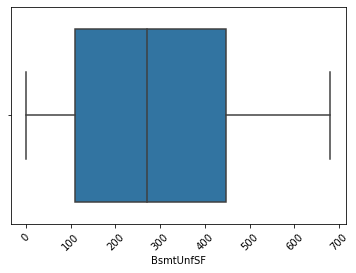

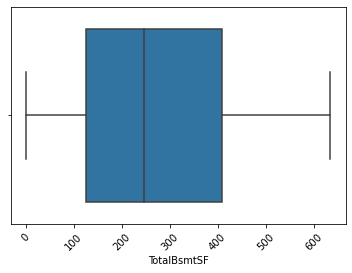

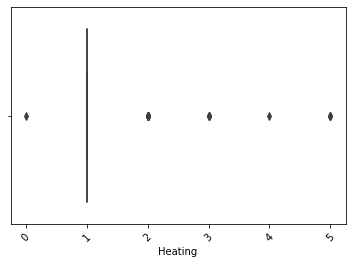

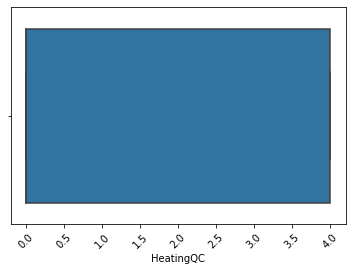

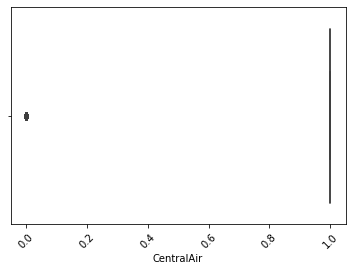

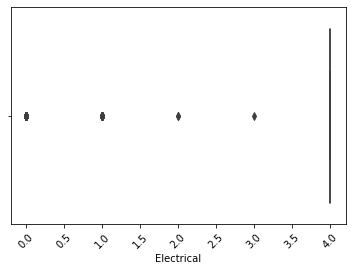

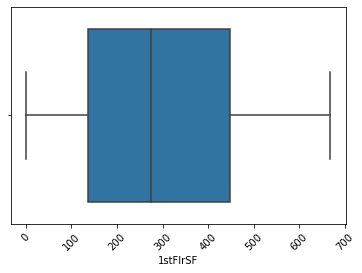

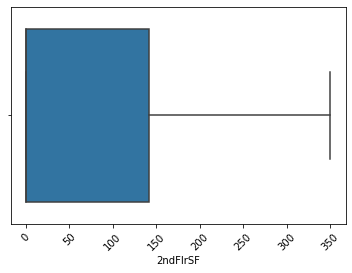

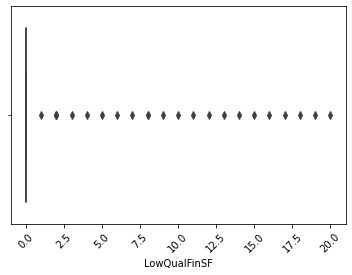

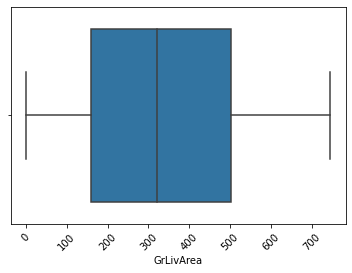

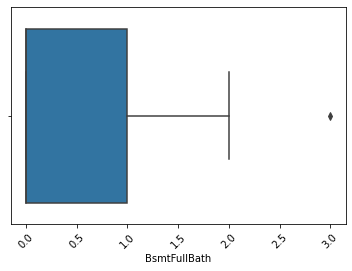

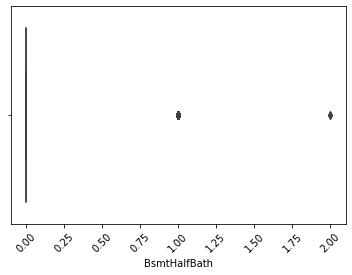

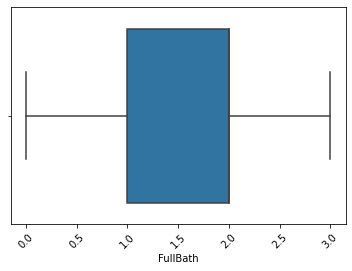

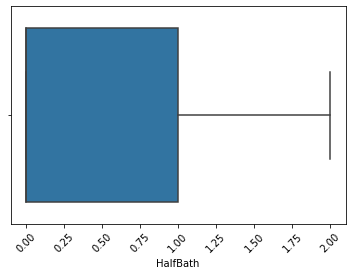

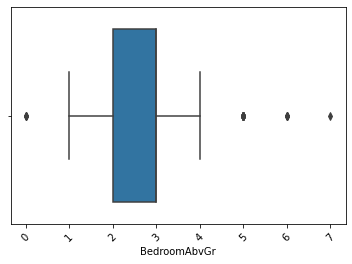

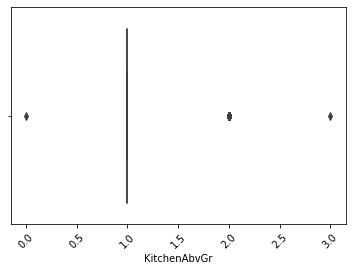

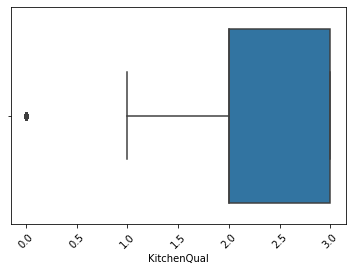

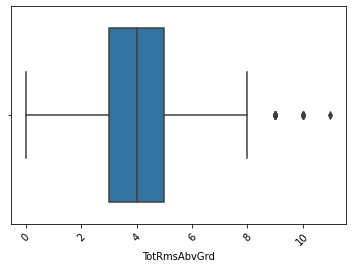

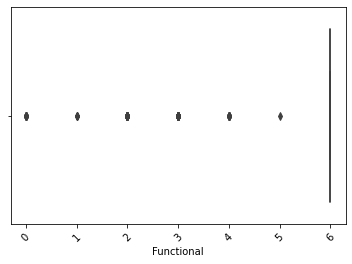

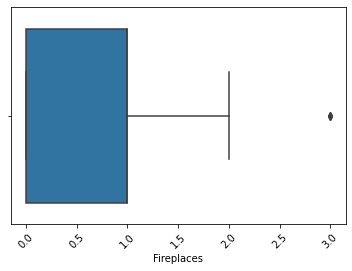

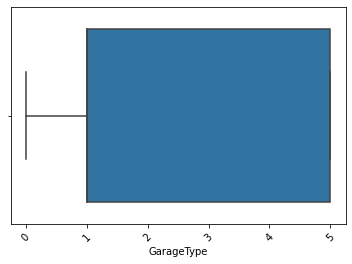

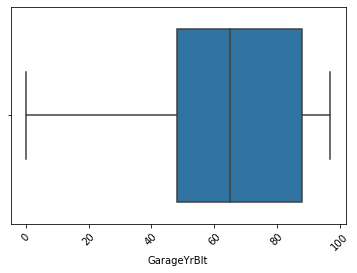

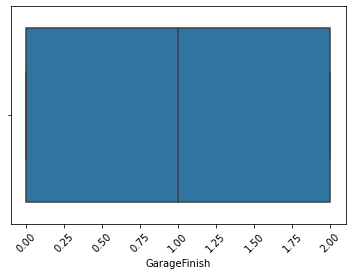

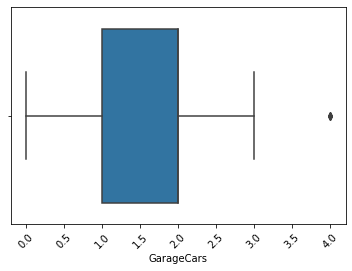

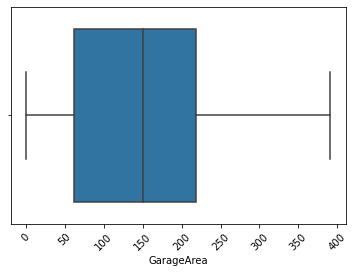

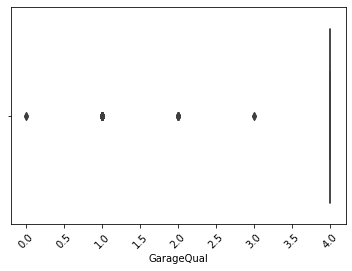

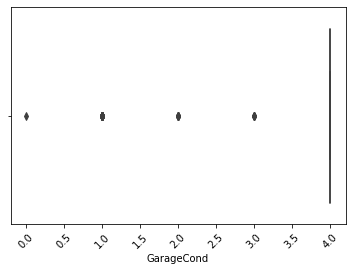

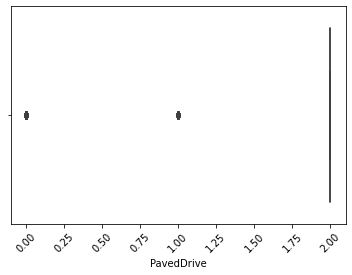

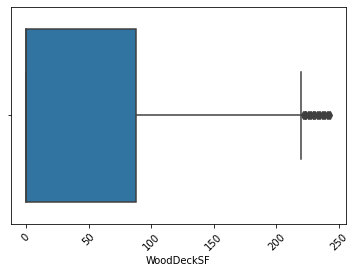

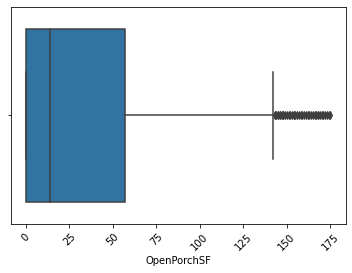

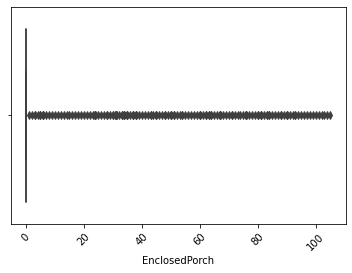

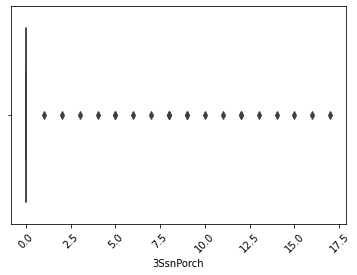

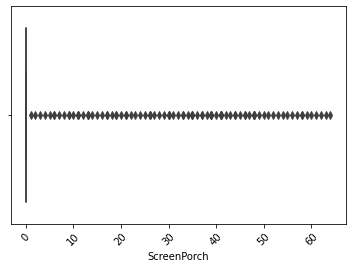

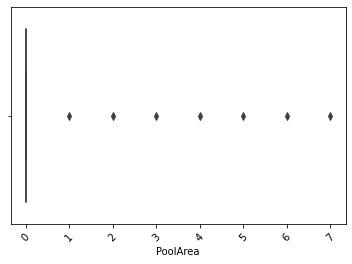

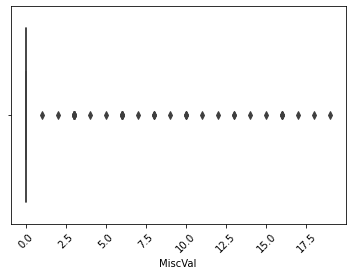

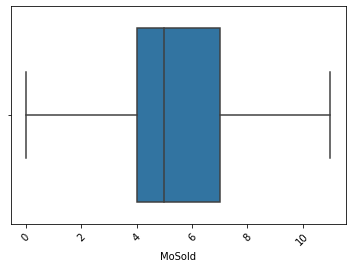

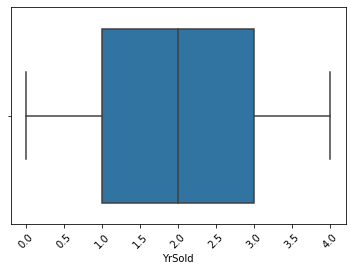

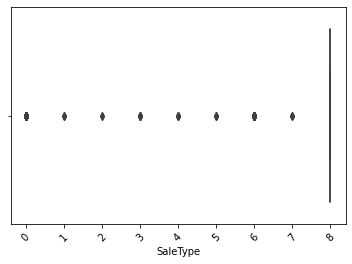

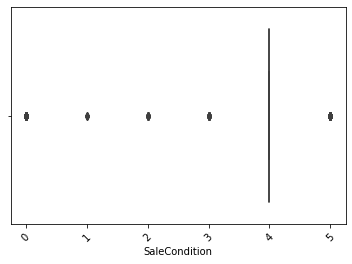

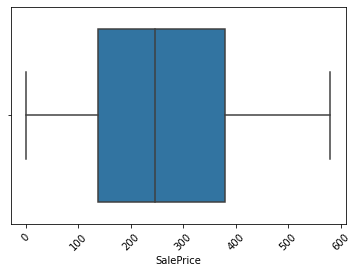

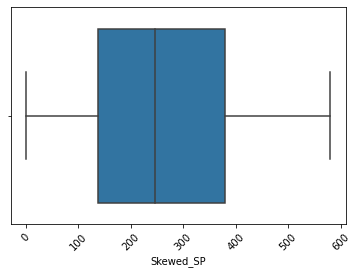

In [52]:
## Checking outliers using box plot:
Numerical_cols = df_train._get_numeric_data().columns
plt.figure(figsize=(20,5))
for i in Numerical_cols:
    sns.boxplot(df_train[i])
    plt.xticks(rotation=45)
    plt.show()

In [53]:
from scipy.stats import zscore
columns = df_train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
           'ScreenPorch','PoolArea','MiscVal']]
z = np.abs(zscore(columns))
new_df =  df_train[(z<3).all(axis=1)] 
new_df.shape

(970, 77)

In [54]:
data_loss =( (1168-970)/1168)*100
data_loss

16.95205479452055

In [55]:
from scipy.stats import zscore
columns = df_train[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
           'ScreenPorch','PoolArea','MiscVal']]
z = np.abs(zscore(columns))
new_df =  df_train[(z<6).all(axis=1)] 
new_df.shape

(1141, 77)

In [56]:
data_loss =( (1168-1141)/1168)*100
data_loss

2.3116438356164384

In [57]:
new_df.skew().head(50)

Id              -0.002472
MSSubClass       0.661925
MSZoning        -1.779260
LotFrontage      0.433223
LotArea          0.167581
Street         -16.822526
LotShape        -0.608370
LandContour     -3.162826
Utilities        0.000000
LotConfig       -1.123097
LandSlope        4.841030
Neighborhood     0.056040
Condition1       3.107114
Condition2      12.463892
BldgType         2.287228
HouseStyle       0.285839
OverallQual      0.148352
OverallCond      0.607161
YearBuilt       -0.472854
YearRemodAdd    -0.499494
RoofStyle        1.492658
RoofMatl         7.869099
Exterior1st     -0.618272
Exterior2nd     -0.599011
MasVnrType      -0.069280
MasVnrArea       1.319138
ExterQual       -1.821570
ExterCond       -2.606715
Foundation      -0.039482
BsmtQual        -1.309758
BsmtCond        -3.312366
BsmtExposure    -1.116941
BsmtFinType1    -0.010971
BsmtFinSF1       0.536376
BsmtFinType2    -3.621809
BsmtFinSF2       3.560251
BsmtUnfSF        0.223152
TotalBsmtSF      0.370386
Heating     

In [116]:
new_df.skew().tail(25)

KitchenQual      -1.409055
TotRmsAbvGrd      0.521240
Functional       -3.425617
Fireplaces        0.677109
GarageType        0.748380
GarageYrBlt      -0.573485
GarageFinish     -0.350020
GarageCars       -0.361010
GarageArea        0.341111
GarageQual       -4.549442
GarageCond       -5.416729
PavedDrive       -3.312428
WoodDeckSF        1.165728
OpenPorchSF       1.299443
EnclosedPorch     2.046826
3SsnPorch         8.919410
ScreenPorch       3.129071
PoolArea         33.778692
MiscVal           5.928974
MoSold            0.220957
YrSold            0.106968
SaleType         -3.634830
SaleCondition    -2.702017
SalePrice         0.288933
Skewed_SP         0.288933
dtype: float64

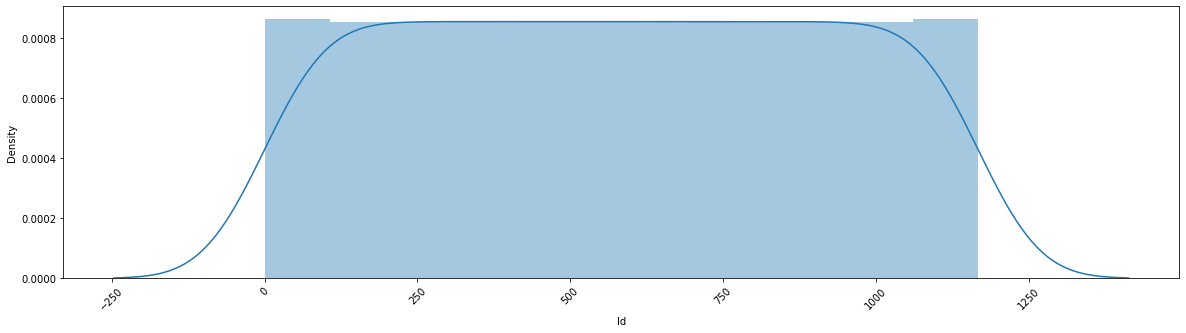

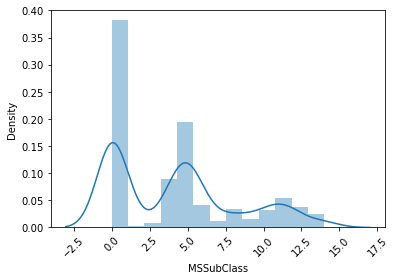

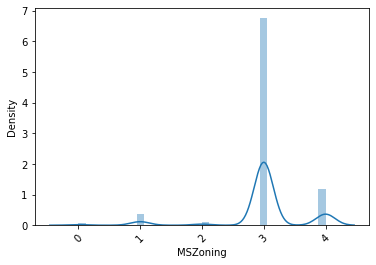

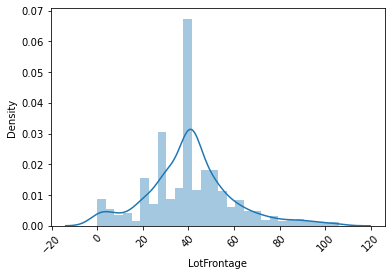

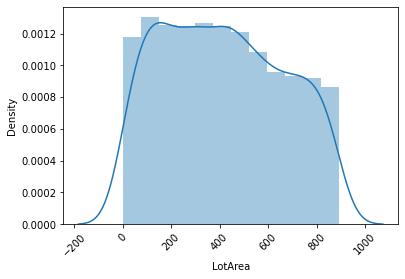

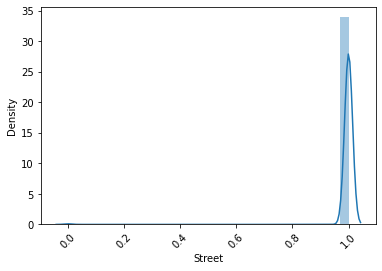

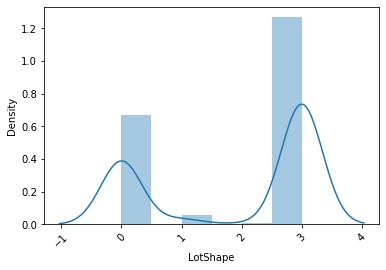

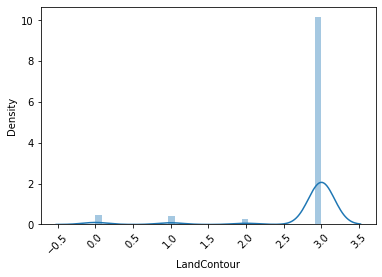

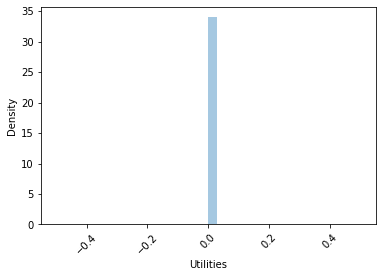

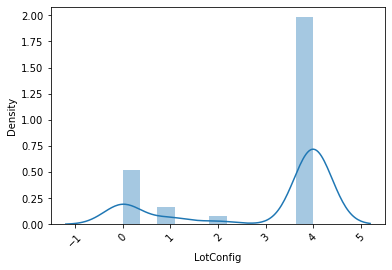

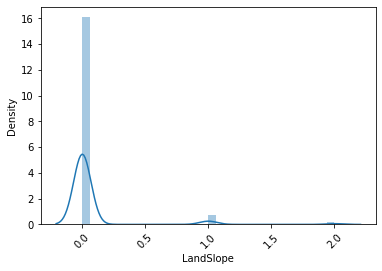

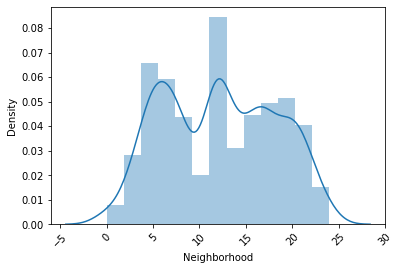

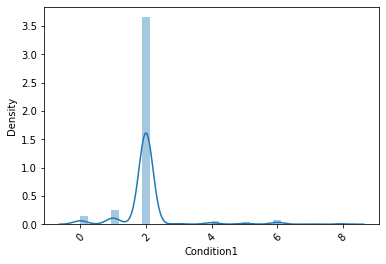

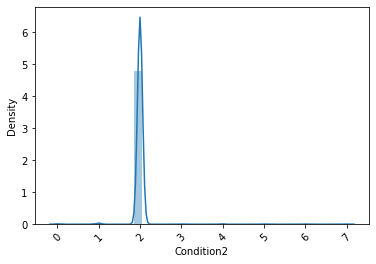

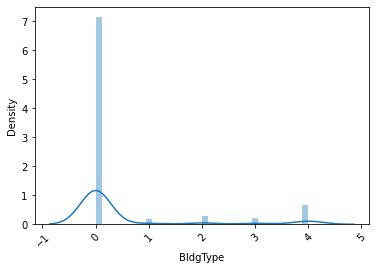

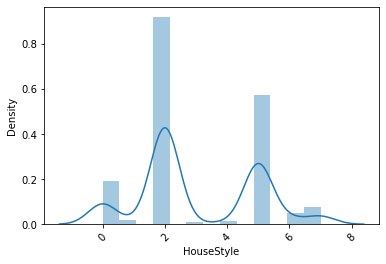

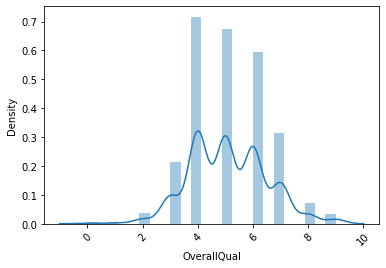

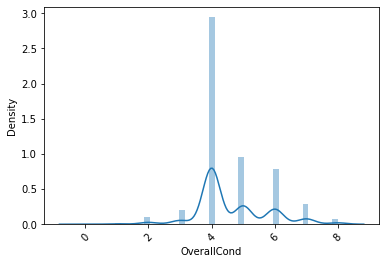

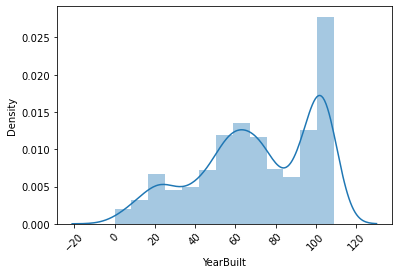

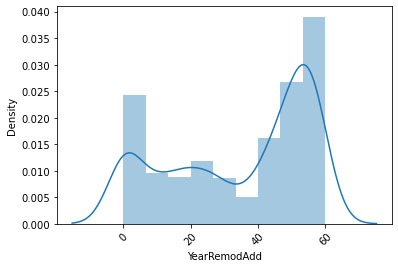

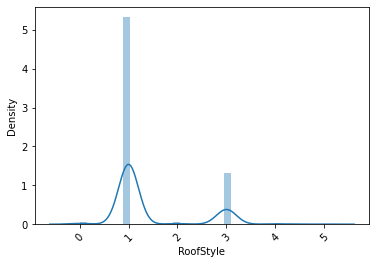

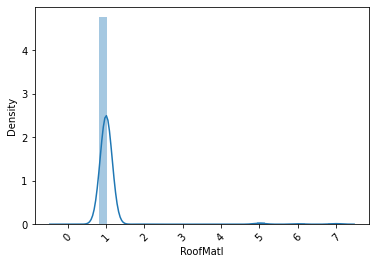

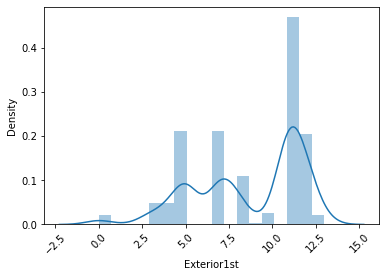

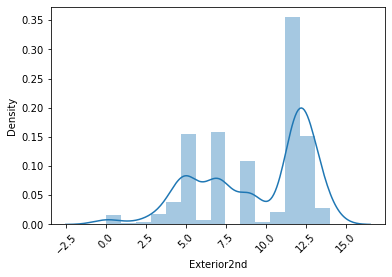

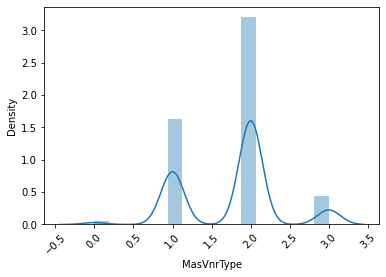

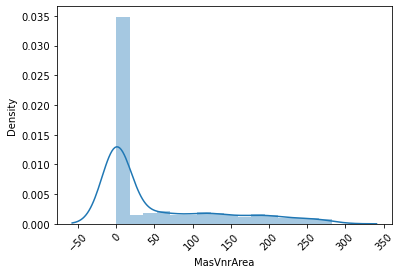

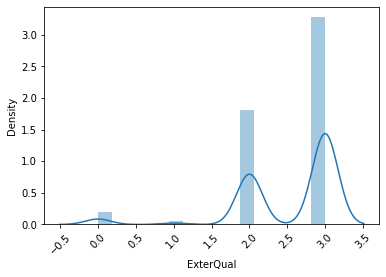

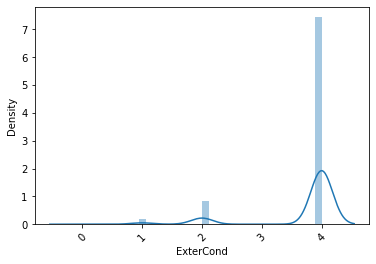

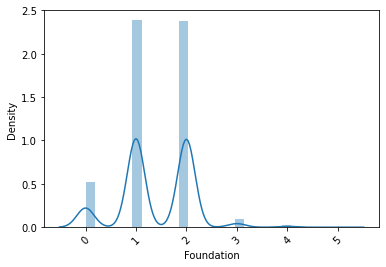

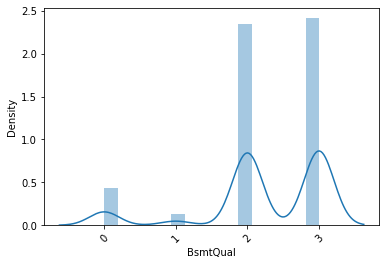

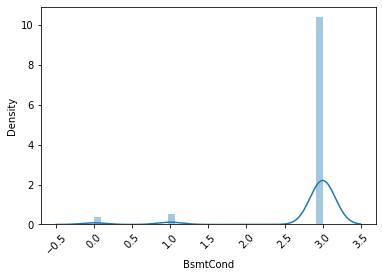

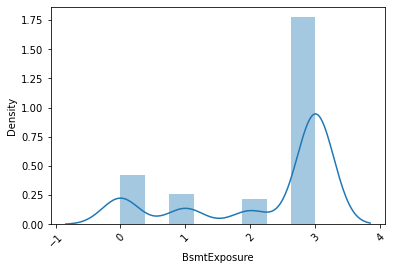

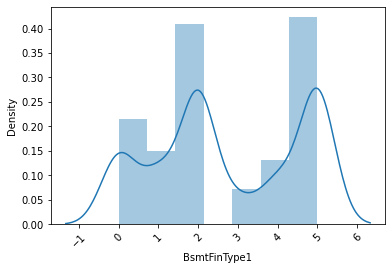

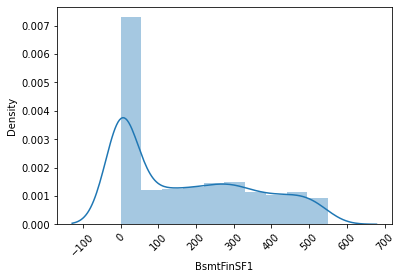

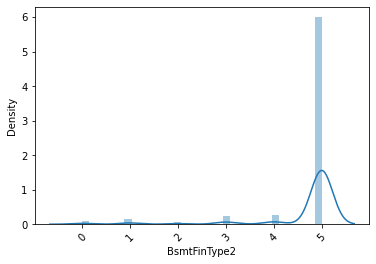

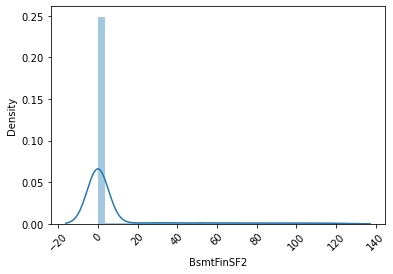

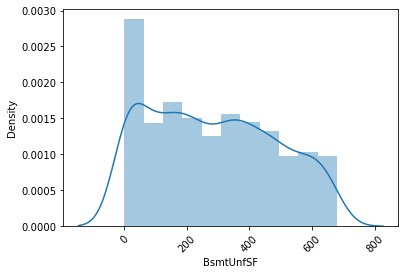

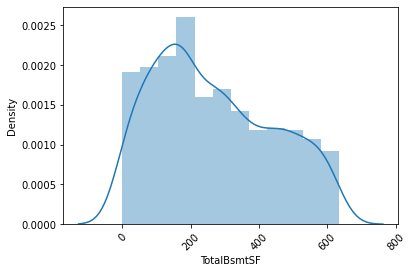

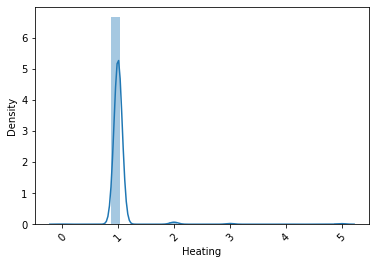

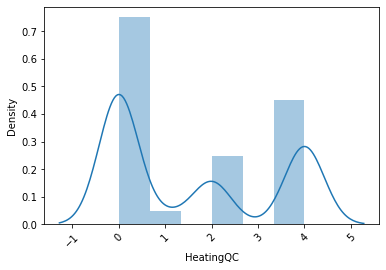

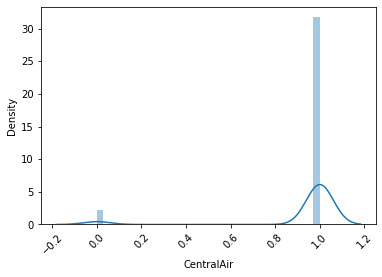

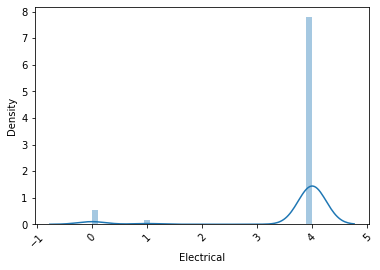

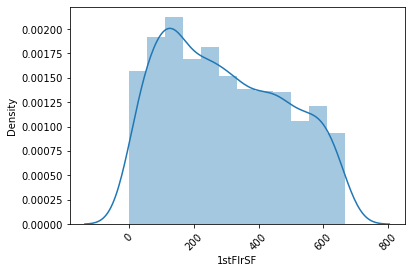

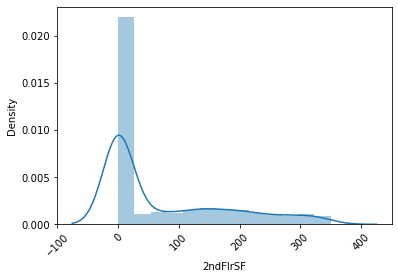

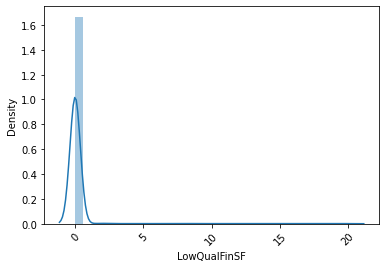

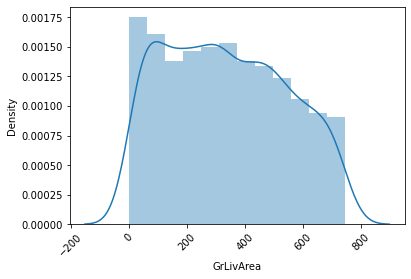

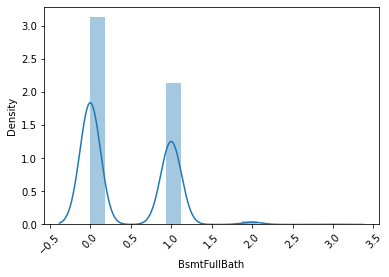

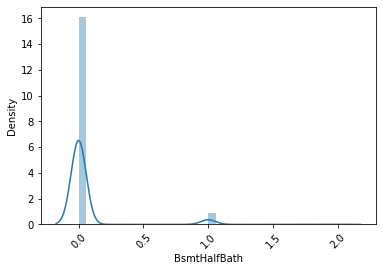

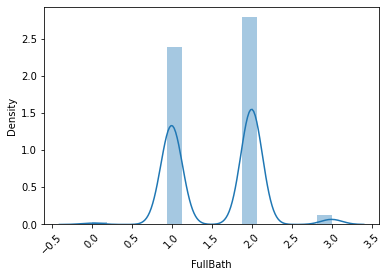

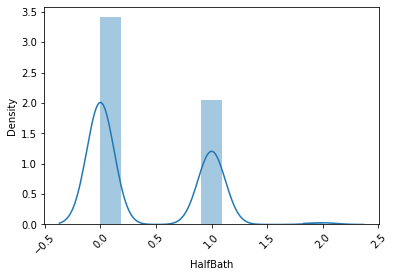

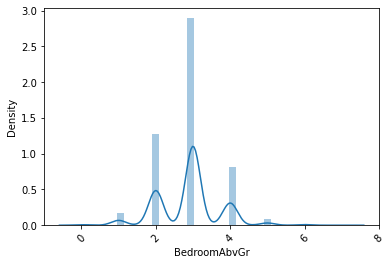

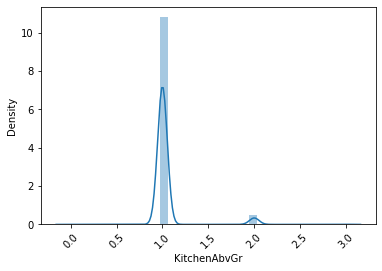

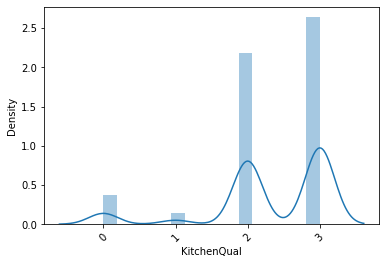

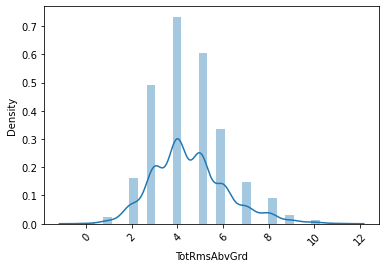

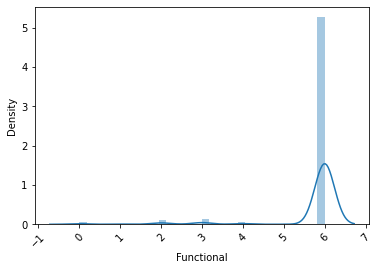

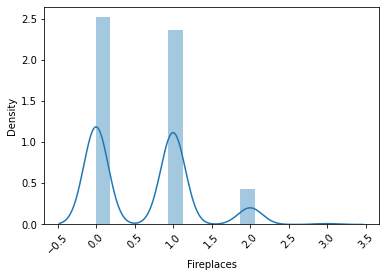

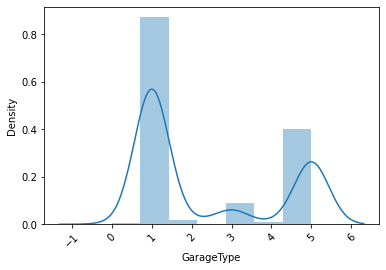

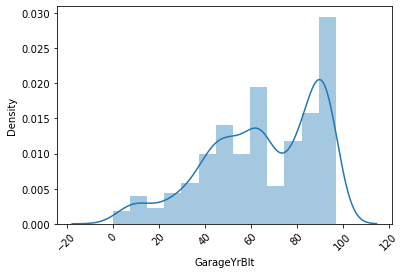

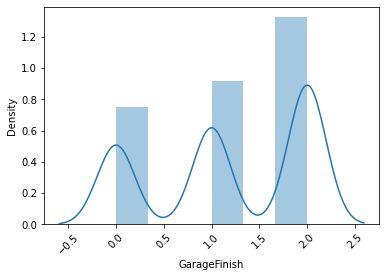

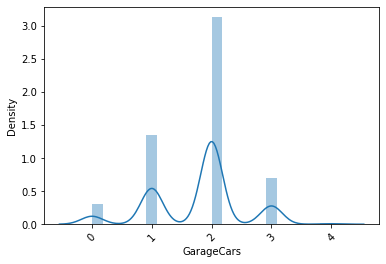

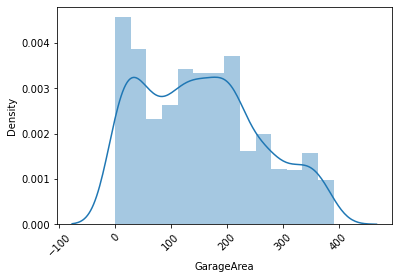

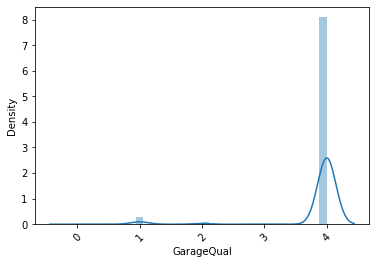

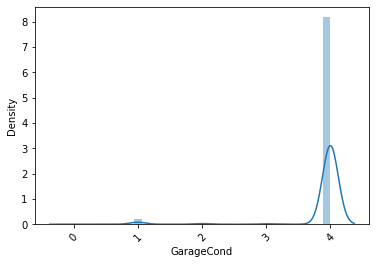

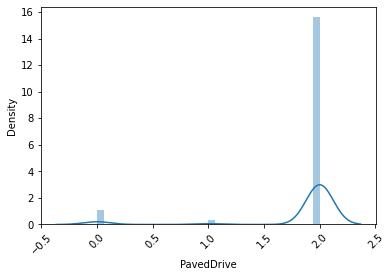

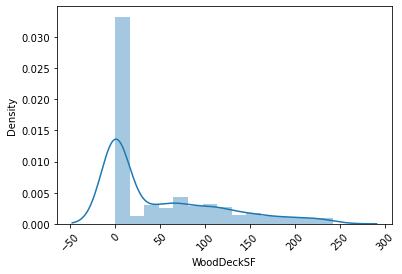

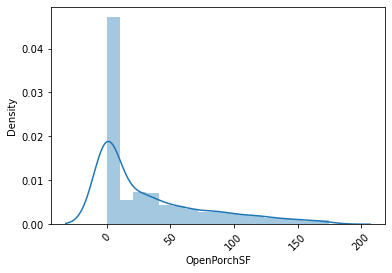

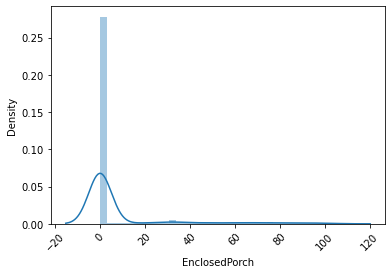

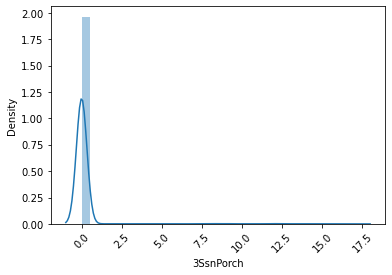

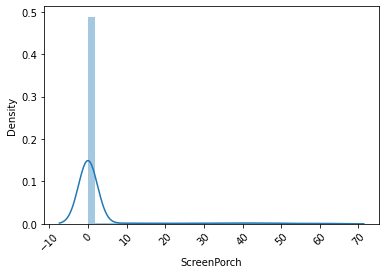

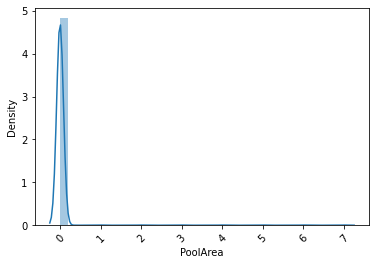

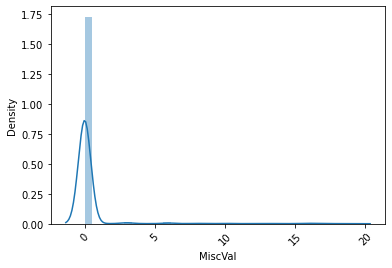

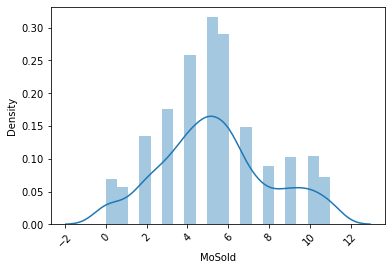

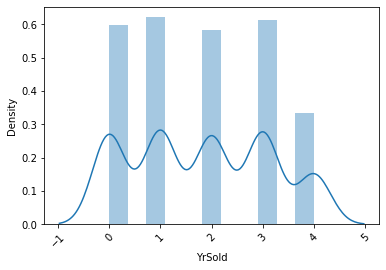

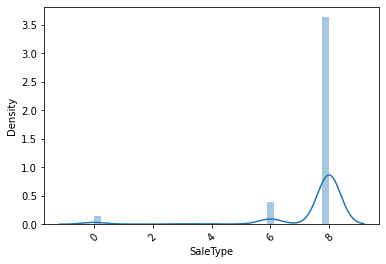

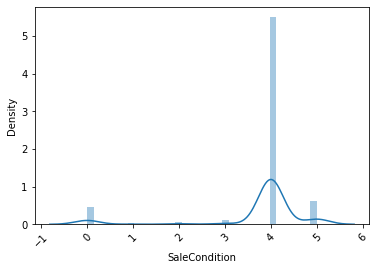

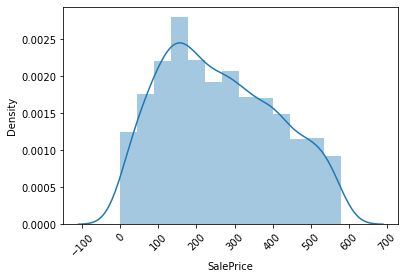

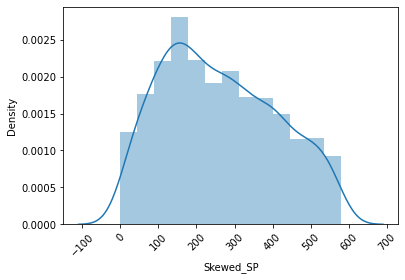

In [117]:
## Checking skewness using distribution plot:
Numerical_cols = df_train._get_numeric_data().columns

plt.figure(figsize=(20,5))
for i in Numerical_cols:
    sns.distplot(df_train[i])
    plt.xticks(rotation=45)
    plt.show()

As in the given data set,Most of the columns have categorical value or discrete value,So I have removed skewness only from those columns which have continuous data.

In [118]:
from sklearn.preprocessing import PowerTransformer
skewed_features = ['MSZoning','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','Heating','CentralAir','Electrical','LowQualFinSF',
'BsmtHalfBath','KitchenAbvGr','Functional','EnclosedPorch','ScreenPorch','PoolArea','MiscVal']
scaler = PowerTransformer(method='yeo-johnson')

In [119]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

MSZoning  LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0  -0.11859     0.054790 -1.378377   -0.834429   -0.546188   -0.358588   
1  -0.11859     1.302463  1.511023   -0.834429    0.122919    2.788743   
2  -0.11859     1.157913  0.200081   -0.834429    1.079760   -0.358588   
3  -0.11859     1.776205  0.882253    1.296104    0.888853   -0.358588   
4  -0.11859     0.054790  1.556514    1.175529    1.333214   -0.358588   

   TotalBsmtSF   Heating  CentralAir  Electrical  LowQualFinSF  BsmtHalfBath  \
0     0.204533 -0.093022    0.267136    0.303094     -0.103096     -0.239709   
1     1.792808 -0.093022    0.267136    0.303094     -0.103096     -0.239709   
2     0.340966 -0.093022    0.267136    0.303094     -0.103096     -0.239709   
3     1.647455 -0.093022    0.267136    0.303094     -0.103096     -0.239709   
4     1.415644 -0.093022    0.267136    0.303094     -0.103096      4.171717   

   KitchenAbvGr  Functional  EnclosedPorch  ScreenPorch  PoolArea   MiscVal  
0     -0.159017    0.270882      -0.408248    -0.292631 -0.029617 -0.164325  
1     -0.159017    0.270882      -0.408248     3.417277 -0.029617 -0.164325  
2     -0.159017    0.270882      -0.408248    -0.292631 -0.029617 -0.164325  
3     -0.159017    0.270882      -0.408248    -0.292631 -0.029617 -0.164325  
4     -0.159017    0.270882      -0.408248    -0.292631 -0.029617 -0.164325

In [120]:
x=new_df.drop(columns=['SalePrice'])
y=new_df['SalePrice']

In [121]:
x.shape,y.shape

((1141, 76), (1141,))

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0 -1.451864    1.647652  -0.11859     0.054790 -1.378377  0.059313 -1.375992   
1  0.408493   -0.999855  -0.11859     1.302463  1.511023  0.059313 -1.375992   
2  0.176692    0.203557  -0.11859     1.157913  0.200081  0.059313 -1.375992   
3 -1.496441   -0.999855  -0.11859     1.776205  0.882253  0.059313 -1.375992   
4 -0.717825   -0.999855  -0.11859     0.054790  1.556514  0.059313 -1.375992   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0     0.316291        0.0   0.605569  -0.224910      0.146675   -0.046706   
1     0.316291        0.0   0.605569   3.290471     -0.018860   -0.046706   
2     0.316291        0.0  -1.223965  -0.224910      0.477747   -0.046706   
3     0.316291        0.0   0.605569  -0.224910      0.312211   -0.046706   
4     0.316291        0.0  -0.614120  -0.224910      0.312211   -0.046706   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0   -0.018652  2.951134   -0.563074    -0.077161    -0.523873   0.132172   
1   -0.018652 -0.406875   -0.563074     1.366137     0.377694  -0.077235   
2   -0.018652 -0.406875    1.027192     0.644488    -0.523873   0.830195   
3   -0.018652 -0.406875   -0.563074    -0.077161     0.377694   0.167073   
4   -0.018652 -0.406875   -0.563074    -0.077161     1.279260   0.167073   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0     -0.427092  -0.482307 -0.129654    -0.211899    -0.104195    0.397955   
1     -0.715927  -1.697124  6.372998     1.075861     1.047251    0.397955   
2      0.583829  -0.482307 -0.129654    -0.533839    -0.679918    0.397955   
3     -0.378953   1.947328 -0.129654    -0.211899    -0.104195   -1.229526   
4      0.728247  -0.482307 -0.129654    -1.499659    -1.543503    2.025436   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0   -0.834429   0.670382   0.359385   -0.570717 -0.304517  0.291927   
1   -0.834429  -0.764714  -2.383482    0.854202  0.865360 -2.695419   
2   -0.834429  -0.764714   0.359385    0.854202 -0.304517  0.291927   
3    1.296104   0.670382   0.359385   -0.570717 -0.304517  0.291927   
4    1.175529  -0.764714   0.359385   -0.570717 -0.304517  0.291927   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.649595     -1.497911   -0.546188      0.309177   -0.358588   
1     -1.084178     -1.497911    0.122919     -0.776272    2.788743   
2     -1.951065     -0.401621    1.079760      0.309177   -0.358588   
3      0.649595     -0.949766    0.888853      0.309177   -0.358588   
4      0.649595     -1.497911    1.333214      0.309177   -0.358588   

   BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  Electrical  \
0   1.068325     0.204533 -0.093022   1.393417    0.267136    0.303094   
1   1.202975     1.792808 -0.093022  -0.898315    0.267136    0.303094   
2  -0.751947     0.340966 -0.093022  -0.898315    0.267136    0.303094   
3   1.357573     1.647455 -0.093022  -0.898315    0.267136    0.303094   
4  -0.467685     1.415644 -0.093022   0.247551    0.267136    0.303094   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.622180 -0.703407     -0.103096  -1.277435     -0.814382     -0.239709   
1  1.931443 -0.703407     -0.103096   1.524112      1.101515     -0.239709   
2 -0.002630  1.400451     -0.103096   1.227421      1.101515     -0.239709   
3  1.732109 -0.703407     -0.103096   0.911274     -0.814382     -0.239709   
4  1.322668 -0.703407     -0.103096   0.322754     -0.814382      4.171717   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0    0.7985 -0.775789     -1.088326     -0.159017     0.809193     -0.970244   
1    0.7985 -0.775789      1.422856     -0.159017    -0.394574      0.956174   
2    0.7985  1.208910      0.167265     -0.159017     0.809193      0.956174   
3    0.7985 -0.775789      0.167265     -0.159017  

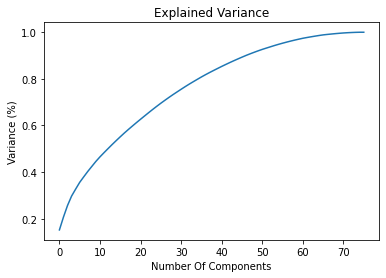

In [123]:
from sklearn.decomposition import PCA
pca = PCA()
comp = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number Of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [124]:
for i in range(20,60):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

20  variance :0.6108582516031085
21  variance :0.6246325850401552
22  variance :0.6391530027141267
23  variance :0.6534089101954672
24  variance :0.6672986874008127
25  variance :0.6807754340833909
26  variance :0.6936613660671435
27  variance :0.706810661198551
28  variance :0.7191385066617729
29  variance :0.7311540988327384
30  variance :0.7428823754186934
31  variance :0.7543644486048883
32  variance :0.7651306522235701
33  variance :0.776653663891854
34  variance :0.7864852653377098
35  variance :0.797426165102092
36  variance :0.8072520302223378
37  variance :0.8169360581856993
38  variance :0.8264921507946918
39  variance :0.8354160340499461
40  variance :0.8440052899965022
41  variance :0.853208579767155
42  variance :0.8613664887770767
43  variance :0.8698401223431764
44  variance :0.8777899896606653
45  variance :0.8854207252042394
46  variance :0.89288593332319
47  variance :0.9004279353848748
48  variance :0.9073392252196686
49  variance :0.9139784705521827
50  variance :0.

we can see upto 60 components explain almost all varaince present in dataset.



BUILDING MODEL

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

In [126]:
#Finding the best random state
max_r2_score=0
for r_state in range(50,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    score=r2_score(y_test,y_pred)
    if score>max_r2_score:
        max_r2_score=score
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r2_score)

max r2 score corresponding to 50 is 1.0


In [127]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=155,shuffle=True)

In [128]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(855, 76)
(855,)
(286, 76)
(286,)


In [129]:
lr=LinearRegression()
rid=Ridge(alpha=1.0)
ls=Lasso()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
sgd=SGDRegressor()

In [130]:
def fun(f):
    f.fit(x_train,y_train)
    y_pred = f.predict(x_test)
    
    mean_absolute_error_ = mean_absolute_error(y_test,y_pred)
    mean_squared_error_ = mean_squared_error(y_test,y_pred)
    r2_score_ = r2_score(y_test,y_pred)
    
    kFold = KFold(n_splits=3,shuffle=True,random_state=42)
    scores = cross_val_score(f,x,y,cv=kFold,scoring='r2',n_jobs=-1)
    
    mean_cv_scores = np.mean(scores)
    std_cv_scores = np.std(scores)
    
    diff_acc_score_cv_score = np.abs(r2_score_ - mean_cv_scores)
    
    print('mean_absolute_error: ',mean_absolute_error_)
    print('mean_squared_error: ',mean_squared_error_)
    print('r2_score: ',r2_score_)
    
    print('Cross Val Score: ',mean_cv_scores)
    print('Cross Val std: ',std_cv_scores)
    print('Diff Between score and CV score: ', diff_acc_score_cv_score)

In [131]:
fun(lr)

mean_absolute_error:  1.758965933280248e-13
mean_squared_error:  4.6128966906878443e-26
r2_score:  1.0
Cross Val Score:  1.0
Cross Val std:  0.0
Diff Between score and CV score:  0.0


In [132]:
fun(rid)

mean_absolute_error:  0.4630456247282758
mean_squared_error:  0.35255618274069317
r2_score:  0.9999848094963951
Cross Val Score:  0.99996689567564
Cross Val std:  1.371986675984028e-05
Diff Between score and CV score:  1.7913820755111054e-05


In [133]:
fun(ls)

mean_absolute_error:  0.8850584821811904
mean_squared_error:  1.0657951851402727
r2_score:  0.9999540783387314
Cross Val Score:  0.999954919704035
Cross Val std:  3.3304647781307375e-06
Diff Between score and CV score:  8.413653036498658e-07


In [134]:
fun(dtr)

mean_absolute_error:  1.1713286713286712
mean_squared_error:  3.3811188811188813
r2_score:  0.9998543185425
Cross Val Score:  0.999839914087698
Cross Val std:  3.862680157242528e-05
Diff Between score and CV score:  1.4404454801941746e-05


In [135]:
fun(knr)

mean_absolute_error:  43.80559440559441
mean_squared_error:  3458.842237762238
r2_score:  0.850969694891905
Cross Val Score:  0.8361103638712849
Cross Val std:  0.014984935617806672
Diff Between score and CV score:  0.014859331020620092


In [136]:
fun(rf) 

mean_absolute_error:  0.5125174825174824
mean_squared_error:  0.5367475524475532
r2_score:  0.9999768732870687
Cross Val Score:  0.9999620255201274
Cross Val std:  8.498361299019815e-06
Diff Between score and CV score:  1.4847766941383789e-05


In [137]:
fun(svr)

mean_absolute_error:  103.54805012120221
mean_squared_error:  15647.033242763098
r2_score:  0.3258200351704551
Cross Val Score:  0.2886634818414096
Cross Val std:  0.013827380480724258
Diff Between score and CV score:  0.037156553329045494


In [138]:
 fun(gd)

mean_absolute_error:  1.0664017224568303
mean_squared_error:  2.0146213086327145
r2_score:  0.9999131964953403
Cross Val Score:  0.9999203170010807
Cross Val std:  4.775470753696614e-06
Diff Between score and CV score:  7.120505740476624e-06


In [139]:
 fun(sgd)

mean_absolute_error:  0.18382963531421792
mean_squared_error:  0.0600061724243654
r2_score:  0.9999974145284549
Cross Val Score:  0.9971414144330542
Cross Val std:  0.004037233239624066
Diff Between score and CV score:  0.002856000095400768


In [140]:
 fun(ad)

mean_absolute_error:  6.58656745119901
mean_squared_error:  63.139920665497414
r2_score:  0.9972795053967631
Cross Val Score:  0.997613929263804
Cross Val std:  0.00026423084692603127
Diff Between score and CV score:  0.00033442386704085614


In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
for i in range(2,11):
    score=cross_val_score(rf,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.9999301388366097
At CV= 3 0.9999655955789454
At CV= 4 0.9999666488344433
At CV= 5 0.9999726599979164
At CV= 6 0.9999739838308184
At CV= 7 0.9999764811735712
At CV= 8 0.9999770906456242
At CV= 9 0.9999782079577777
At CV= 10 0.9999794970632507


In [143]:
for i in range(2,11):
    score=cross_val_score(rid,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.9999290623844916
At CV= 3 0.9999671045824297
At CV= 4 0.9999753087801918
At CV= 5 0.9999785973094337
At CV= 6 0.9999805865418329
At CV= 7 0.9999814116691138
At CV= 8 0.9999825027774438
At CV= 9 0.9999831759811032
At CV= 10 0.9999833504846298


In [144]:
import pickle
filename='House_Price_Prediction.pkl'
pickle.dump(rid,open(filename,'wb'))

      Actual     Predict
117      319  318.728248
713      528  527.099183
1074      36   36.766876
977      417  416.818267
725      199  198.682848
...      ...         ...
722      559  558.826828
1073     409  409.368178
378      193  193.834016
386      359  359.419411
957      134  134.520885

[286 rows x 2 columns]


Text(0.5, 1.0, 'Ridge Regressor')

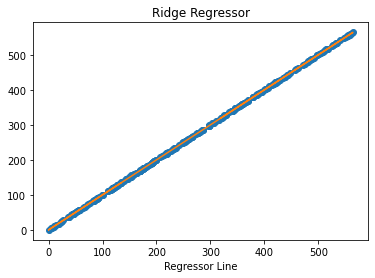

In [145]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rid.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(rid.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('Ridge Regressor')